# Imports

In [1]:
import sklearn
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Opening 

In [2]:
foot = pd.DataFrame(pd.read_csv('footdata.csv',sep = ','))

In [3]:
foot

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,04/08/07,Bordeaux,Lens,1,0,H,1,0,H,13,...,19,4,4,3,2,0,1,2.20,2.87,3.60
1,04/08/07,Caen,Nice,1,0,H,0,0,D,16,...,15,2,3,1,1,0,0,2.40,2.75,3.00
2,04/08/07,Lille,Lorient,0,0,D,0,0,D,6,...,19,2,2,1,1,0,0,1.72,3.00,5.00
3,04/08/07,Monaco,St Etienne,1,1,D,1,0,H,16,...,3,5,6,3,3,0,0,1.90,2.90,4.00
4,04/08/07,Paris SG,Sochaux,0,0,D,0,0,D,11,...,17,5,9,2,1,0,0,1.72,3.40,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,17/05/08,Nancy,Rennes,2,3,A,1,1,D,18,...,26,7,6,1,3,0,0,1.65,3.60,5.50
376,17/05/08,Nice,Caen,3,1,H,1,1,D,14,...,14,4,11,0,1,0,0,2.05,3.25,3.75
377,17/05/08,Sochaux,Paris SG,1,2,A,0,1,A,17,...,19,6,5,2,2,0,0,3.80,3.25,2.00
378,17/05/08,St Etienne,Monaco,4,0,H,3,0,H,20,...,12,2,2,0,1,0,0,1.72,3.40,5.25


# Statistical Analysis and Dataframe Transformation

## Classic Statistical Analysis

Nous allons commencer par une analyse statistiques. Après avoir affiché les principaux indicateurs statistiques, nous allons chercher à décrire et présenter la donnée de la meilleur des manières possibles.

In [4]:
foot.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.347368,0.936842,0.573684,0.434211,14.113158,11.026316,4.834211,3.581579,16.926316,17.955263,5.402632,4.178947,1.468421,1.805263,0.073684,0.113158,2.236974,3.179526,4.153026
std,1.180478,1.027953,0.742485,0.668467,4.368916,4.032106,2.113255,2.031721,4.708925,5.049162,2.535967,2.343706,1.100037,1.225918,0.281050,0.348893,0.730307,0.370348,1.757391
min,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,2.500000,1.500000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,8.000000,3.750000,2.000000,14.000000,14.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000,1.800000,3.000000,3.200000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,3.000000,17.000000,18.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.100000,3.100000,3.750000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,20.000000,21.000000,7.000000,5.000000,2.000000,3.000000,0.000000,0.000000,2.400000,3.250000,4.750000
max,6.000000,6.000000,3.000000,3.000000,29.000000,26.000000,11.000000,11.000000,32.000000,33.000000,14.000000,14.000000,6.000000,5.000000,2.000000,2.000000,7.500000,6.500000,15.000000


Avoir décrit les statistiques est assez peu parlant. Il est assez difficile de se les représenter.

Pour visualiser au mieux les données, nous décidons de réaliser des graphiques boites à moustaches. Ces derniers vont nous permettre de visualiser les grandeurs statistiques usuelles telle que la médiane mais aussi de voir les valeurs aberrantes. 

Ces dernières sont représentées pas des losanges sur le graphiques ci-dessous. 

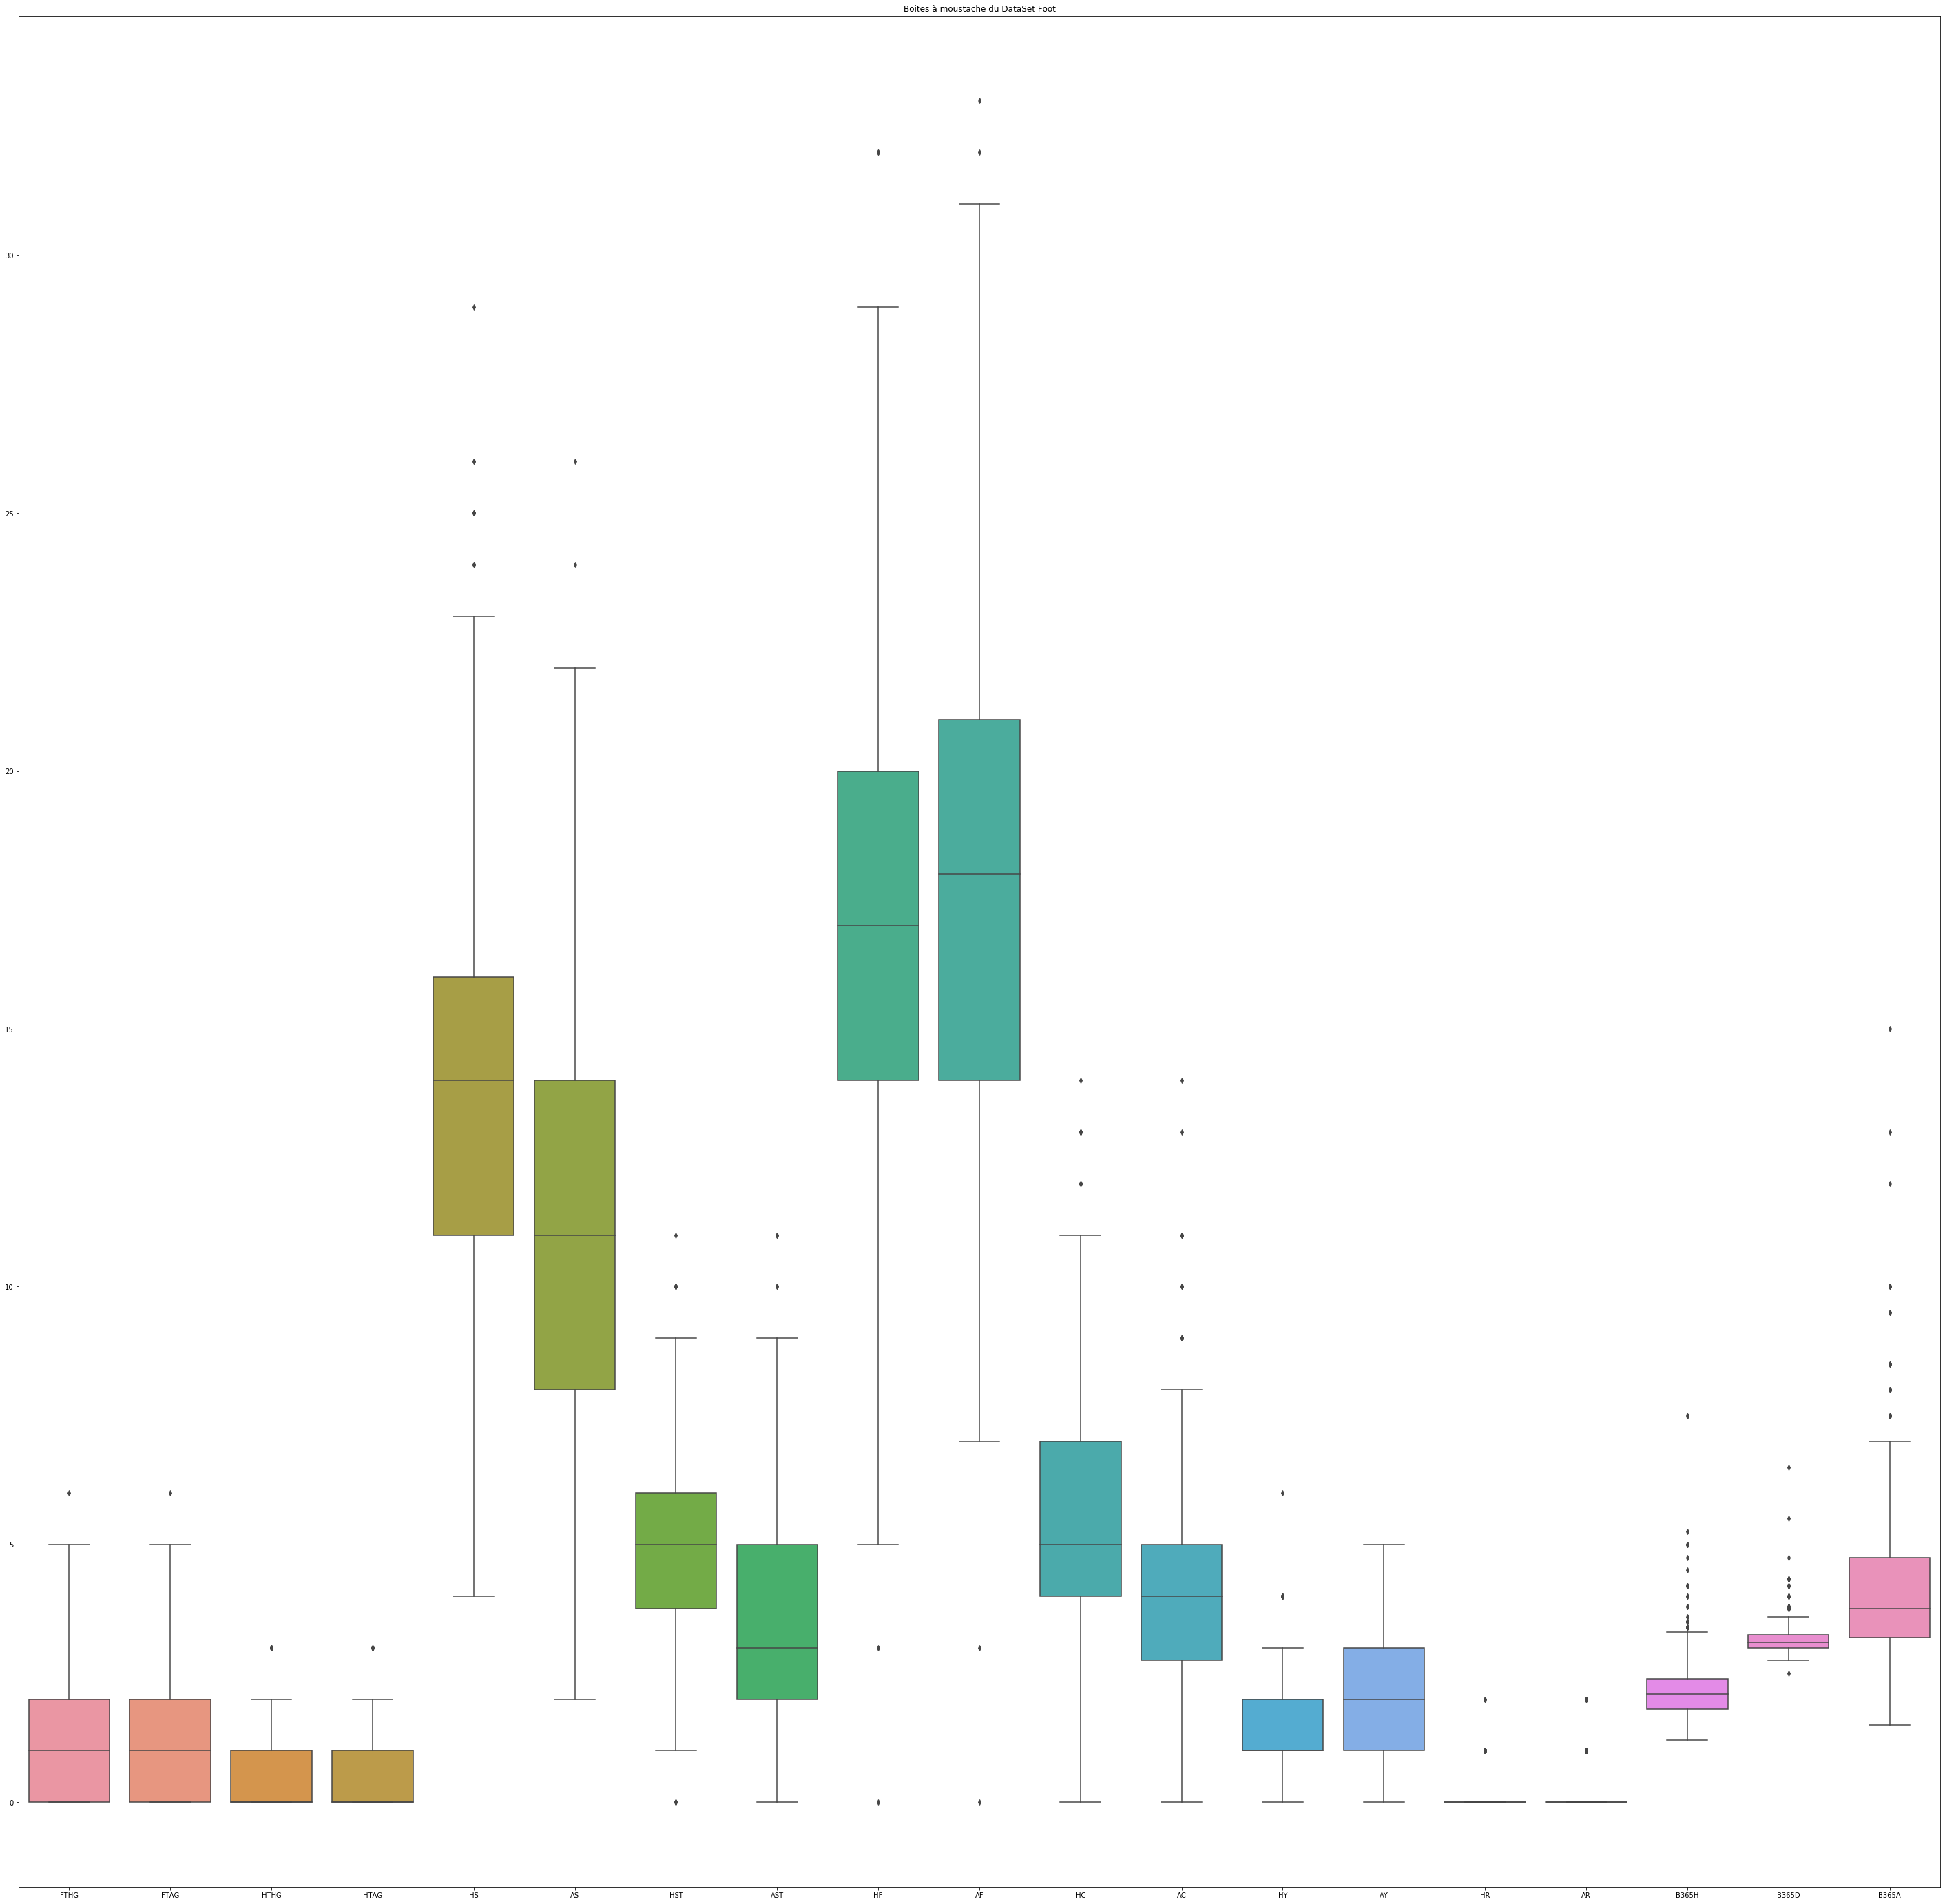

<Figure size 3600x3600 with 0 Axes>

In [6]:
# Boites à moustache
foot_for_box_plot = foot.drop(["Date","HomeTeam","AwayTeam","HTR","FTR"],axis = 1)
plt.title('Boites à moustache du DataSet Foot')
seaborn.boxplot(data = foot_for_box_plot)
plt.figure()
plt.rc('figure', figsize=[50, 50])

Nous remarquons qu'il y a un grand nombre de valeurs aberrantes. Le nombre est d'autant plus aberrants sur les côtes des paris sportifs (B365H, B365D, B365A).

Cependant avoir des valeurs aberrantes ou extrême n'est pas quelque chose de surprenant quand on s'y connait un peu en football. En effet, parfois, il y a des matchs surprenants qui se terminent sur un score fleuve, par exemple.

**Il était important de remarquer les nombreuses valeurs extrêmes de ce dataset car ces dernières peuvent biaiser les données et donner plus de poids à certaines variables qu'elles n'en ont réellement. Il faudra peut être les retraiter par la suite.**

## Statistical Analysis by Teams and Home vs Away

Afin de mieux visualiser la donnée, nous avons décidé de restructurer un peu différemment le dataframe de base en le réindexant par équipe et en s'intéressant aux statistiques globales et non plus aux statistiques par matchs. 

### Creation of Data Frame Concerning Home Results

Nous commençons par créer un dataframe composé uniquement des données liées aux matchs à domicile (Home). 

In [7]:
foot_home_victory = foot[foot["FTR"]=='H']
foot_home_victory = foot_home_victory.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()

In [8]:
foot_home_defeat = foot[foot["FTR"]=='A']
foot_home_defeat = foot_home_defeat.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()

In [9]:
foot_home_nul = foot[foot["FTR"]=='D']
foot_home_nul = foot_home_nul.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()

In [10]:
Home_Results = foot_home_victory.merge(foot_home_defeat,how ='left',right_on = 'HomeTeam',left_on = 'HomeTeam')

In [11]:
Home_Results = Home_Results.merge(foot_home_nul,how = 'left',right_on = 'HomeTeam',left_on = 'HomeTeam')

In [12]:
def total_goal(x):
    result = (x.FTHG_x + x.FTHG_y + x.FTHG)
    return result
Home_Results["Total Goal"]=Home_Results.apply(lambda row: total_goal(row), axis = 1)

In [13]:
def total_shoot(x):
    result = (x.HS_x + x.HS_y + x.HS)
    return result
Home_Results["Total Shoot"]=Home_Results.apply(lambda row: total_shoot(row), axis = 1)

In [14]:
def total_shoot_on_taget(x):
    result = (x.HST_x + x.HST_y + x.HST)
    return result
Home_Results["On Target"]=Home_Results.apply(lambda row: total_shoot_on_taget(row), axis = 1)

In [15]:
def goal_mitemps(x):
    result = (x.HTHG_x + x.HTHG_y + x.HTHG)
    return result
Home_Results["Goal Mi-Temps"]=Home_Results.apply(lambda row: goal_mitemps(row), axis = 1)

In [16]:
def fautes_total(x):
    result = (x.HF_x + x.HF_y + x.HF)
    return result
Home_Results["Total Fautes"]=Home_Results.apply(lambda row: fautes_total(row), axis = 1)

In [17]:
def jaunes_total(x):
    result = (x.HY_x + x.HY_y + x.HY)
    return result
Home_Results["Total Jaune"]=Home_Results.apply(lambda row: jaunes_total(row), axis = 1)

In [18]:
def rouges_total(x):
    result = (x.HR_x + x.HR_y + x.HR)
    return result
Home_Results["Total Rouge"]=Home_Results.apply(lambda row: rouges_total(row), axis = 1)

In [19]:
def corner_total(x):
    result = (x.HC_x + x.HC_y + x.HC)
    return result
Home_Results["Total Corner"]=Home_Results.apply(lambda row: corner_total(row), axis = 1)

In [20]:
Home_Results = Home_Results.drop(["FTHG_x","FTHG_y","FTHG","HS_x","HS_y","HS","HST_x","HST_y","HST","HTHG_x","HTHG_y","HTHG","HF_x","HF_y","HF","HY","HY_x","HY_y","HR_x","HR_y","HR","HC_x","HC","HC_y"],axis = 1)

In [21]:
Home_Results = Home_Results.rename(columns = {"FTR_x" : "Home Victory","FTR_y" : "Home Defeat", "FTR": "Home_nul"})

In [22]:
Home_Results

,HomeTeam,Home Victory,Home Defeat,Home_nul,Total Goal,Total Shoot,On Target,Goal Mi-Temps,Total Fautes,Total Jaune,Total Rouge,Total Corner
0,Auxerre,8,7,4,20,234,76,8,309,31,2,110
1,Bordeaux,13,2,4,38,245,85,17,349,30,1,87
2,Caen,10,4,5,31,271,101,9,338,28,0,112
3,Le Mans,9,4,6,23,265,81,11,342,24,3,87
4,Lens,5,3,11,26,267,85,7,297,24,0,118
5,Lille,8,4,7,29,286,105,19,346,28,3,102
6,Lorient,9,3,7,18,235,68,9,254,15,0,96
7,Lyon,14,1,4,44,267,111,18,294,30,1,91
8,Marseille,11,5,3,34,307,105,19,291,21,1,109
9,Metz,3,13,3,18,263,91,6,333,33,0,101


### Creation of Data Frame Concerning Home Results

Maintenant, nous créeons un dataframe contenant l'ensemble des données des matchs à l'extérieur des différentes équipes. 

In [23]:
foot_away_victory = foot[foot["FTR"]=='A']
foot_away_victory = foot_away_victory.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()

In [24]:
foot_away_defeat = foot[foot["FTR"]=='H']
foot_away_defeat = foot_away_defeat.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()

In [25]:
foot_away_nul = foot[foot["FTR"]=='D']
foot_away_nul = foot_away_nul.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()

In [26]:
Away_Results = foot_away_victory.merge(foot_away_defeat,how = 'left',right_on='AwayTeam',left_on='AwayTeam')

In [27]:
Away_Results = Away_Results.merge(foot_away_nul,how = 'left',right_on='AwayTeam',left_on='AwayTeam')

In [28]:
def total_goal2(x):
    result = (x.FTAG_x + x.FTAG_y + x.FTAG)
    return result
Away_Results["Total Goal"]=Away_Results.apply(lambda row: total_goal2(row), axis = 1)

In [29]:
def total_shoot2(x):
    result = (x.AS_x + x.AS_y + x.AS)
    return result
Away_Results["Total Shoot"]=Away_Results.apply(lambda row: total_shoot2(row), axis = 1)

In [30]:
def total_shoot_on_taget2(x):
    result = (x.AST_x + x.AST_y + x.AST)
    return result
Away_Results["On Target"]=Away_Results.apply(lambda row: total_shoot_on_taget2(row), axis = 1)

In [31]:
def goal_mitemps2(x):
    result = (x.HTAG_x + x.HTAG_y + x.HTAG)
    return result
Away_Results["Goal Mi-Temps"]=Away_Results.apply(lambda row: goal_mitemps2(row), axis = 1)

In [32]:
def fautes_total2(x):
    result = (x.AF_x + x.AF_y + x.AF)
    return result
Away_Results["Total Fautes"]=Away_Results.apply(lambda row: fautes_total2(row), axis = 1)

In [33]:
def jaunes_total2(x):
    result = (x.AY_x + x.AY_y + x.AY)
    return result
Away_Results["Total Jaune"]=Away_Results.apply(lambda row: jaunes_total2(row), axis = 1)

In [34]:
def rouges_total2(x):
    result = (x.AR_x + x.AR_y + x.AR)
    return result
Away_Results["Total Rouge"]=Away_Results.apply(lambda row: rouges_total2(row), axis = 1)

In [35]:
def corner_total2(x):
    result = (x.AC_x + x.AC_y + x.AC)
    return result
Away_Results["Total Corner"]=Away_Results.apply(lambda row: corner_total2(row), axis = 1)

In [36]:
Away_Results = Away_Results.drop(["FTAG_x","FTAG_y","FTAG","AS_x","AS_y","AS","AST_x","AST_y","AST","HTAG_x","HTAG_y","HTAG","AF_x","AF_y","AF","AY","AY_x","AY_y","AR_x","AR_y","AR","AC_x","AC","AC_y"],axis = 1)

In [37]:
Away_Results = Away_Results.rename(columns = {"FTR_x" : "Away Victory","FTR_y" : "Away Defeat", "FTR": "Away Nul"})

In [38]:
Away_Results

,AwayTeam,Away Victory,Away Defeat,Away Nul,Total Goal,Total Shoot,On Target,Goal Mi-Temps,Total Fautes,Total Jaune,Total Rouge,Total Corner
0,Auxerre,4,11,4,13,237,71,4,309,28,1,71
1,Bordeaux,9,5,5,27,176,64,9,342,42,4,76
2,Caen,3,9,7,17,175,58,8,344,33,2,69
3,Le Mans,5,9,5,23,254,83,9,365,41,3,76
4,Lens,4,13,2,17,192,63,8,304,33,3,86
5,Lille,5,3,11,16,257,82,8,394,32,1,94
6,Lorient,3,7,9,14,164,61,6,310,23,0,83
7,Lyon,10,6,3,30,238,86,19,313,29,2,71
8,Marseille,6,5,8,24,233,69,14,336,35,2,74
9,Metz,2,11,6,10,175,47,2,370,41,4,68


### Using of the New Dataframe

Nous allons commencer par comparer les données équipe par équipe en confrontant les statistiques à domicile et à l'extérieur à l'aide d'histogrammes.

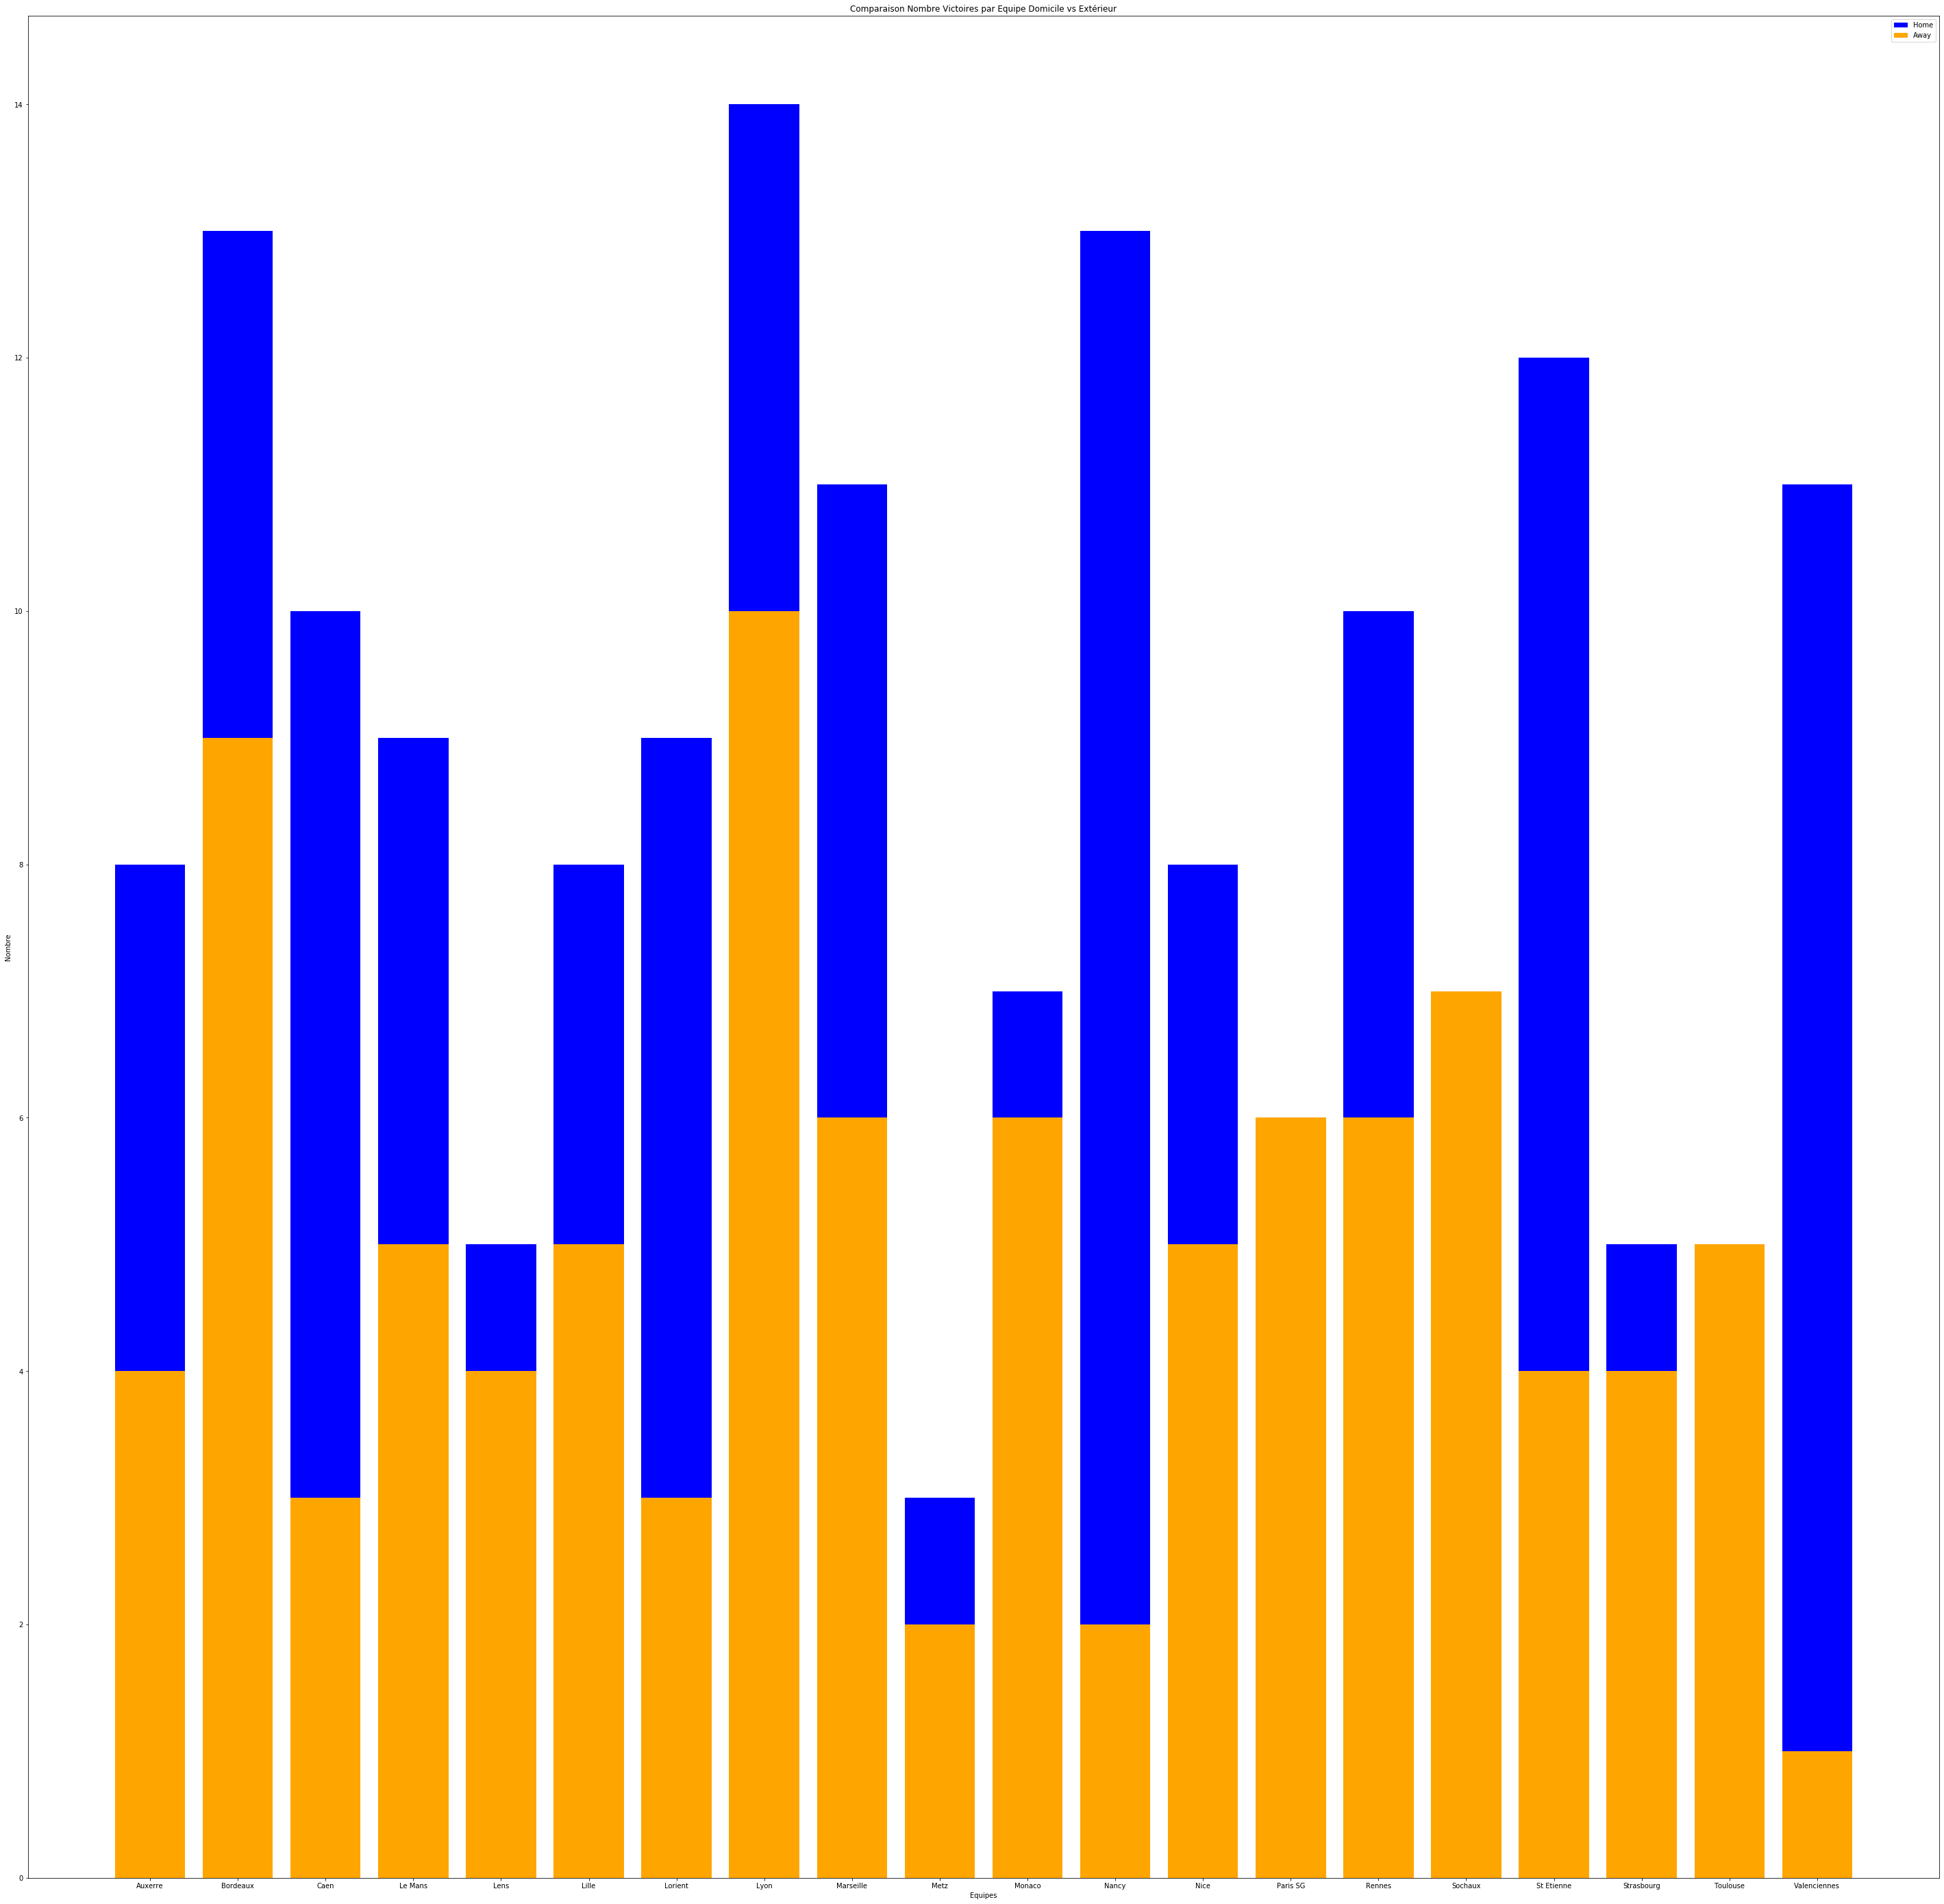

In [39]:
# Victory
teams = list(Away_Results["AwayTeam"])
away_victory = list(Away_Results["Away Victory"])
home_victory = list(Home_Results["Home Victory"])
plt.title("Comparaison Nombre Victoires par Equipe Domicile vs Extérieur")
plt.xlabel('Equipes')
plt.ylabel('Nombre')
plt.bar(teams,home_victory,color = 'blue',label = 'Home')
plt.bar(teams,away_victory,color = 'orange',label = 'Away')
plt.legend()
plt.rc('figure', figsize=[30, 30])

**Conclusion 1 :** Globalement, on remarque que les équipes gagnent plus à domicile qu'à l'extérieur. A de rares exceptions près : PSG, Sochaux, Toulouse.

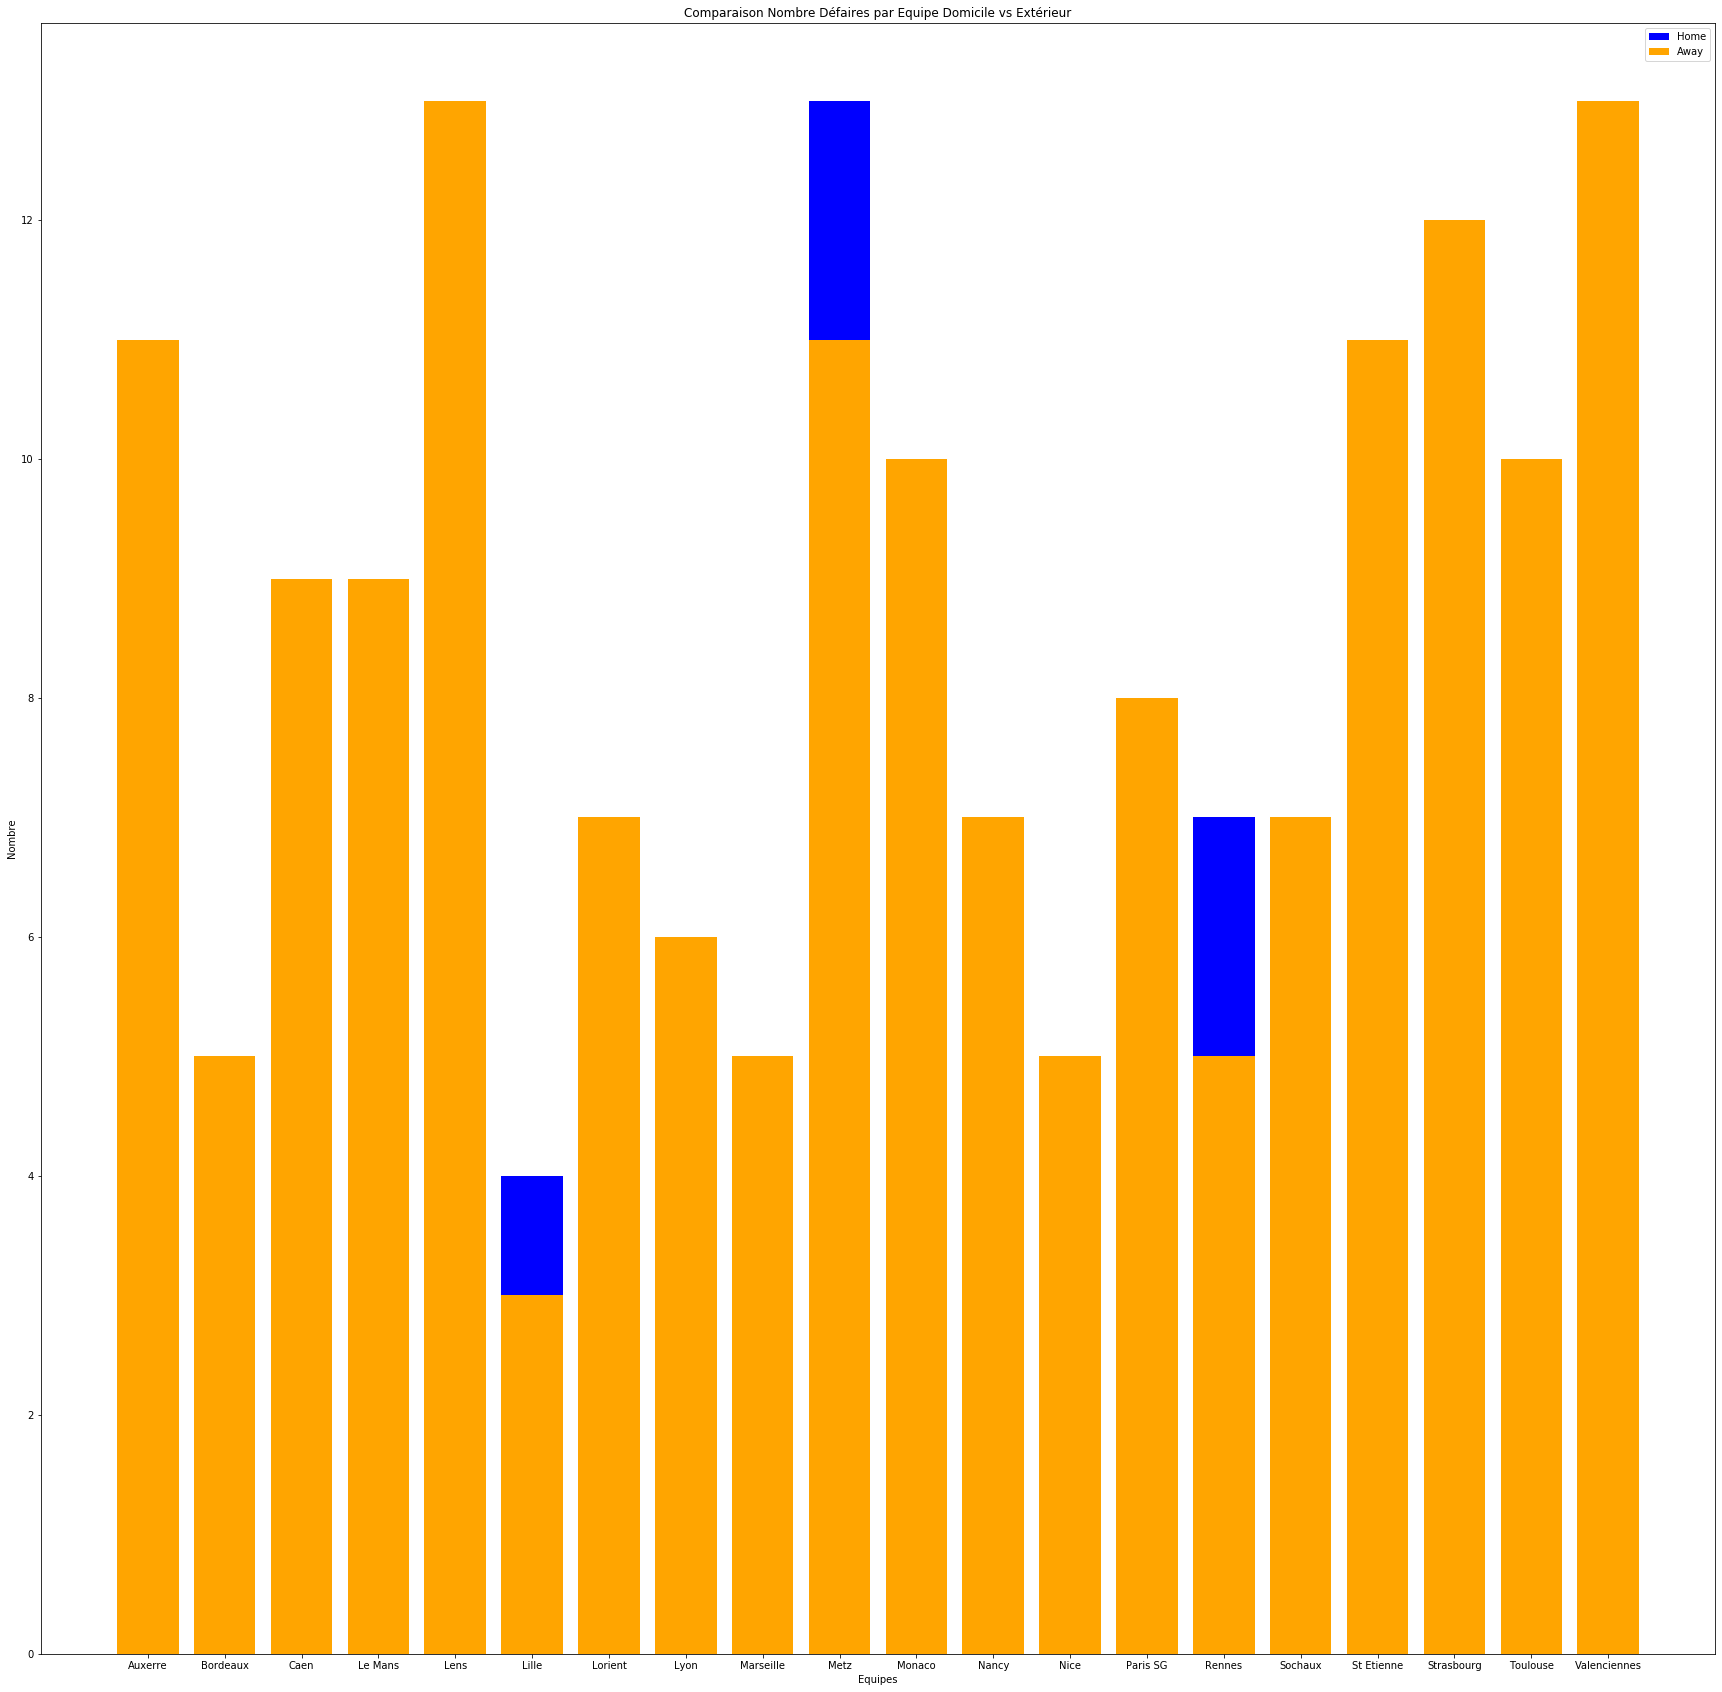

In [40]:
#Defeat
teams = list(Away_Results["AwayTeam"])
away_victory = list(Away_Results["Away Defeat"])
home_victory = list(Home_Results["Home Defeat"])
plt.title("Comparaison Nombre Défaires par Equipe Domicile vs Extérieur")
plt.xlabel('Equipes')
plt.ylabel('Nombre')
plt.bar(teams,home_victory,color = 'blue',label = 'Home')
plt.bar(teams,away_victory,color = 'orange',label = 'Away')
plt.legend()
plt.rc('figure', figsize=[30, 30])

**Conclusion 2 :** De manière connexe, on remarque que les équipes perdent beaucoup plus à l'extérieur qu'à domicile. Rennes et Lille font office d'exception en perdant plus à domicile qu'à l'extérieur. 

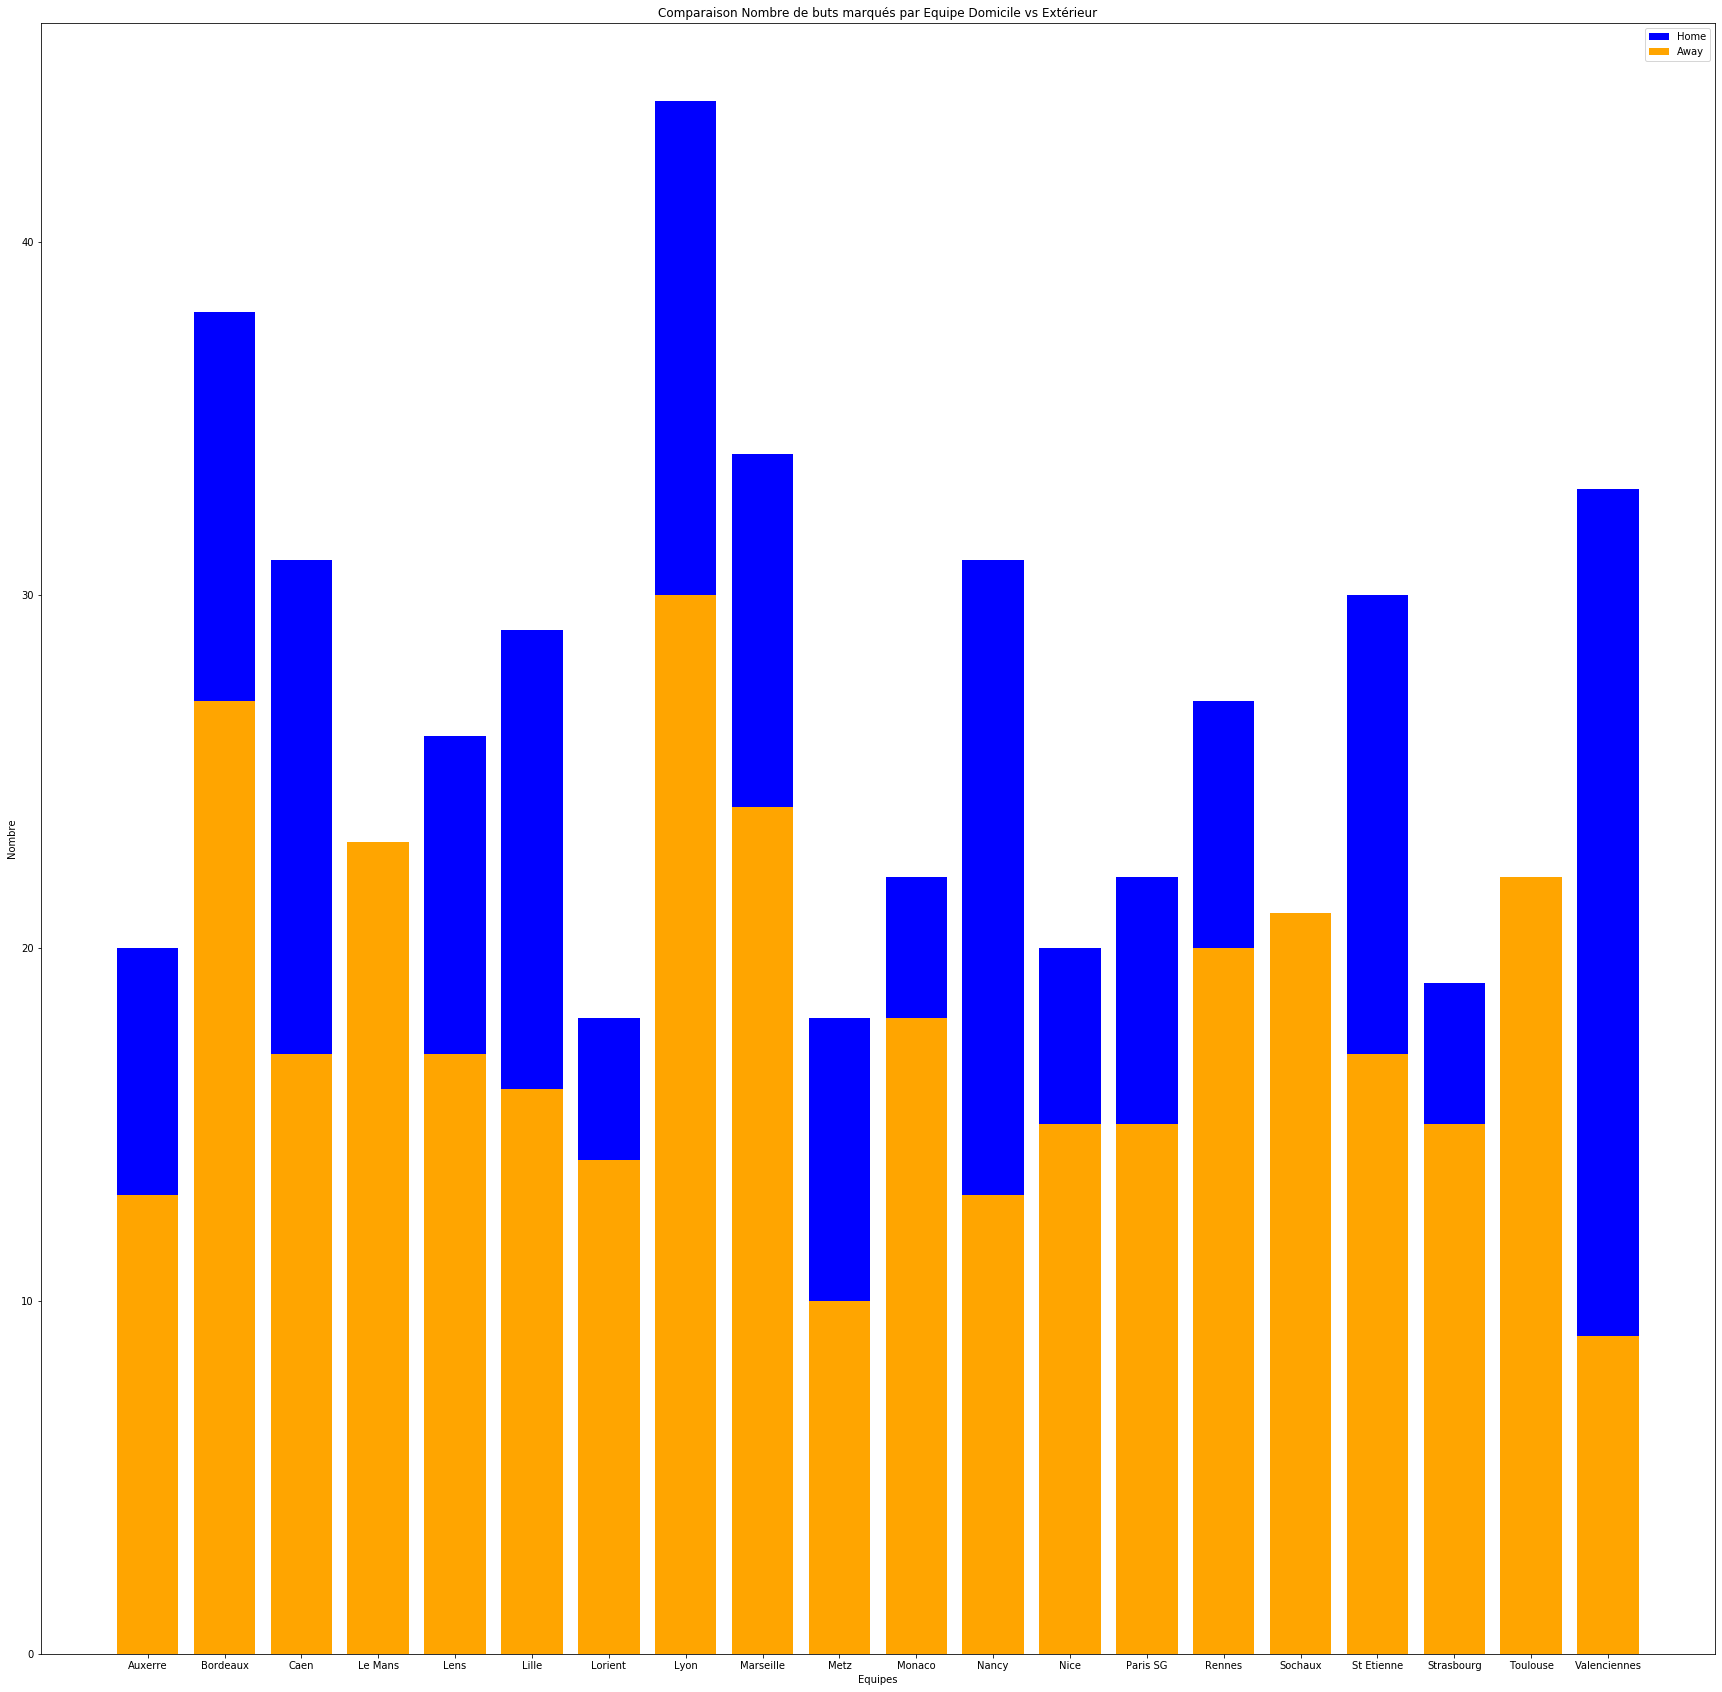

In [41]:
#Goal
teams = list(Away_Results["AwayTeam"])
away_victory = list(Away_Results["Total Goal"])
home_victory = list(Home_Results["Total Goal"])
plt.title("Comparaison Nombre de buts marqués par Equipe Domicile vs Extérieur")
plt.xlabel('Equipes')
plt.ylabel('Nombre')
plt.bar(teams,home_victory,color = 'blue',label = 'Home')
plt.bar(teams,away_victory,color = 'orange',label = 'Away')
plt.legend()
plt.rc('figure', figsize=[30, 30])

**Conclusion 3 :** Les équipes marquent plus à domicile qu'à l'extérieur, à de rares exceptions qui sont Rennes, Toulouse et Le Mans. 

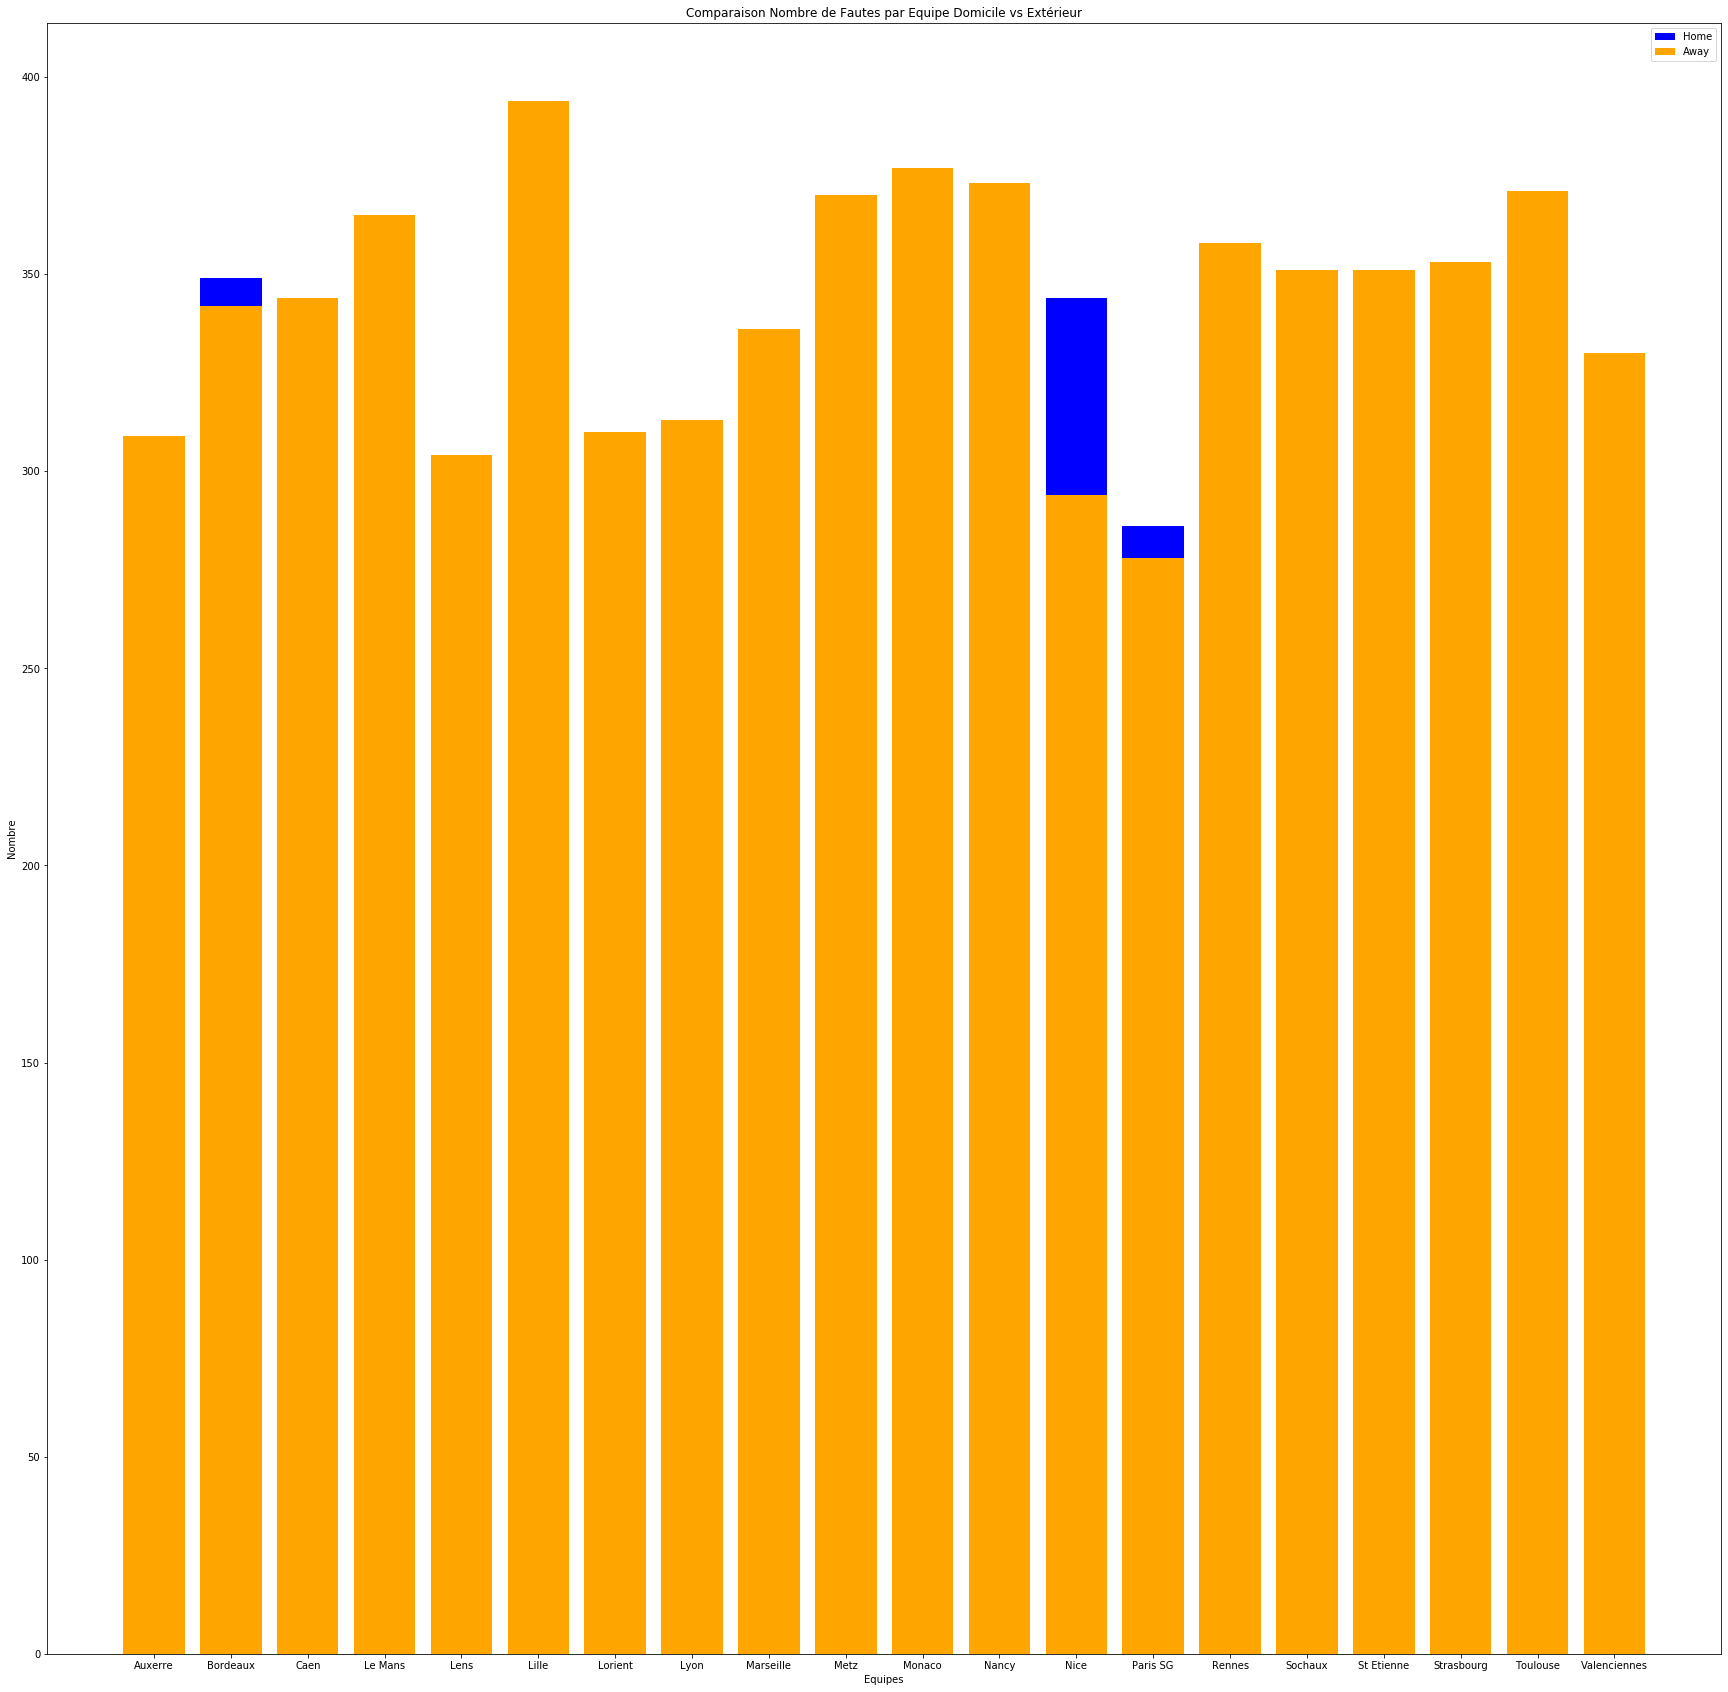

In [42]:
#Fouls
teams = list(Away_Results["AwayTeam"])
away_victory = list(Away_Results["Total Fautes"])
home_victory = list(Home_Results["Total Fautes"])
plt.title("Comparaison Nombre de Fautes par Equipe Domicile vs Extérieur")
plt.xlabel('Equipes')
plt.ylabel('Nombre')
plt.bar(teams,home_victory,color = 'blue',label = 'Home')
plt.bar(teams,away_victory,color = 'orange',label = 'Away')
plt.legend()
plt.rc('figure', figsize=[30, 30])

**Conclusion 4 :** Très clairement, nous remarquons que les équipes font plus de fautes à l'extérieur qu'à domicile. 

### General Conclusion of the Statistical Analysis by Teams and Home vs Away

Nous pouvons affirmer à partir du jeu de données de départ que les équipes de Ligue 1 sont plus performantes à domicile qu'à l'extérieur. Les données étudiées (buts, victoires, défaites et fautes) nous ont conduit à cette conclusion. 

**Nous pouvons supposer qu'il existe une corrélation entre le lieu du match (Home et Away) et les différentes statistiques des équipes. Nous aurons peut-être l'occasion de la confirmer avec une autre méthode**.

## Analysis of Odds

Analysons un peu les cotes au travers d'un outil d'analyse des cotes sportives. 

### Home Analysis

In [107]:
nom_équipe = str(input("Nom de l'équipe dont on souhaite voir l'évolution des côtes ? :"))

Nom de l'équipe dont on souhaite voir l'évolution des côtes ? :Bordeaux


In [110]:
foot_odds_analysis = foot[foot["HomeTeam"]==nom_équipe]

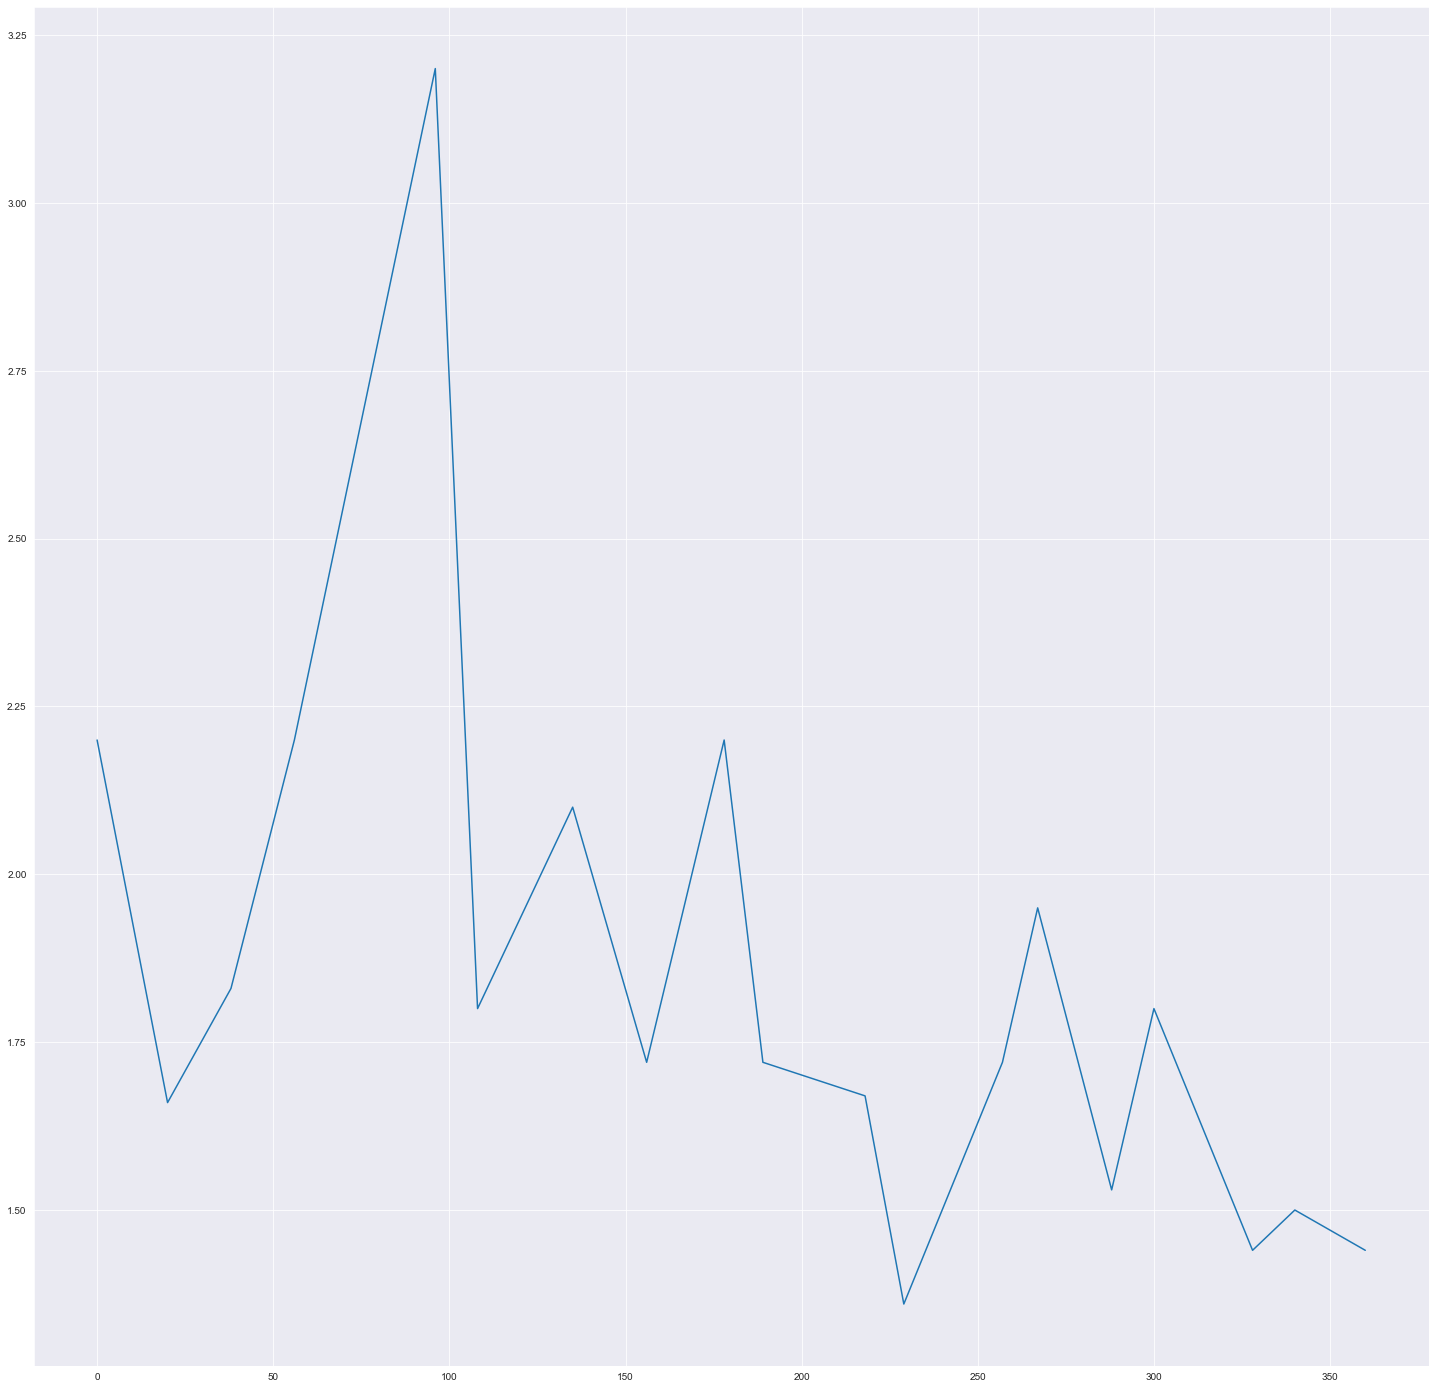

In [111]:
plt.plot(foot_odds_analysis["B365H"])

### Away Analysis

In [117]:
nom_équipe_away = str(input("Nom de l'équipe dont on souhaite voir l'évolution des côtes ? :"))

Nom de l'équipe dont on souhaite voir l'évolution des côtes ? :Lyon


In [118]:
foot_odds_analysis2 = foot[foot["AwayTeam"]==nom_équipe]

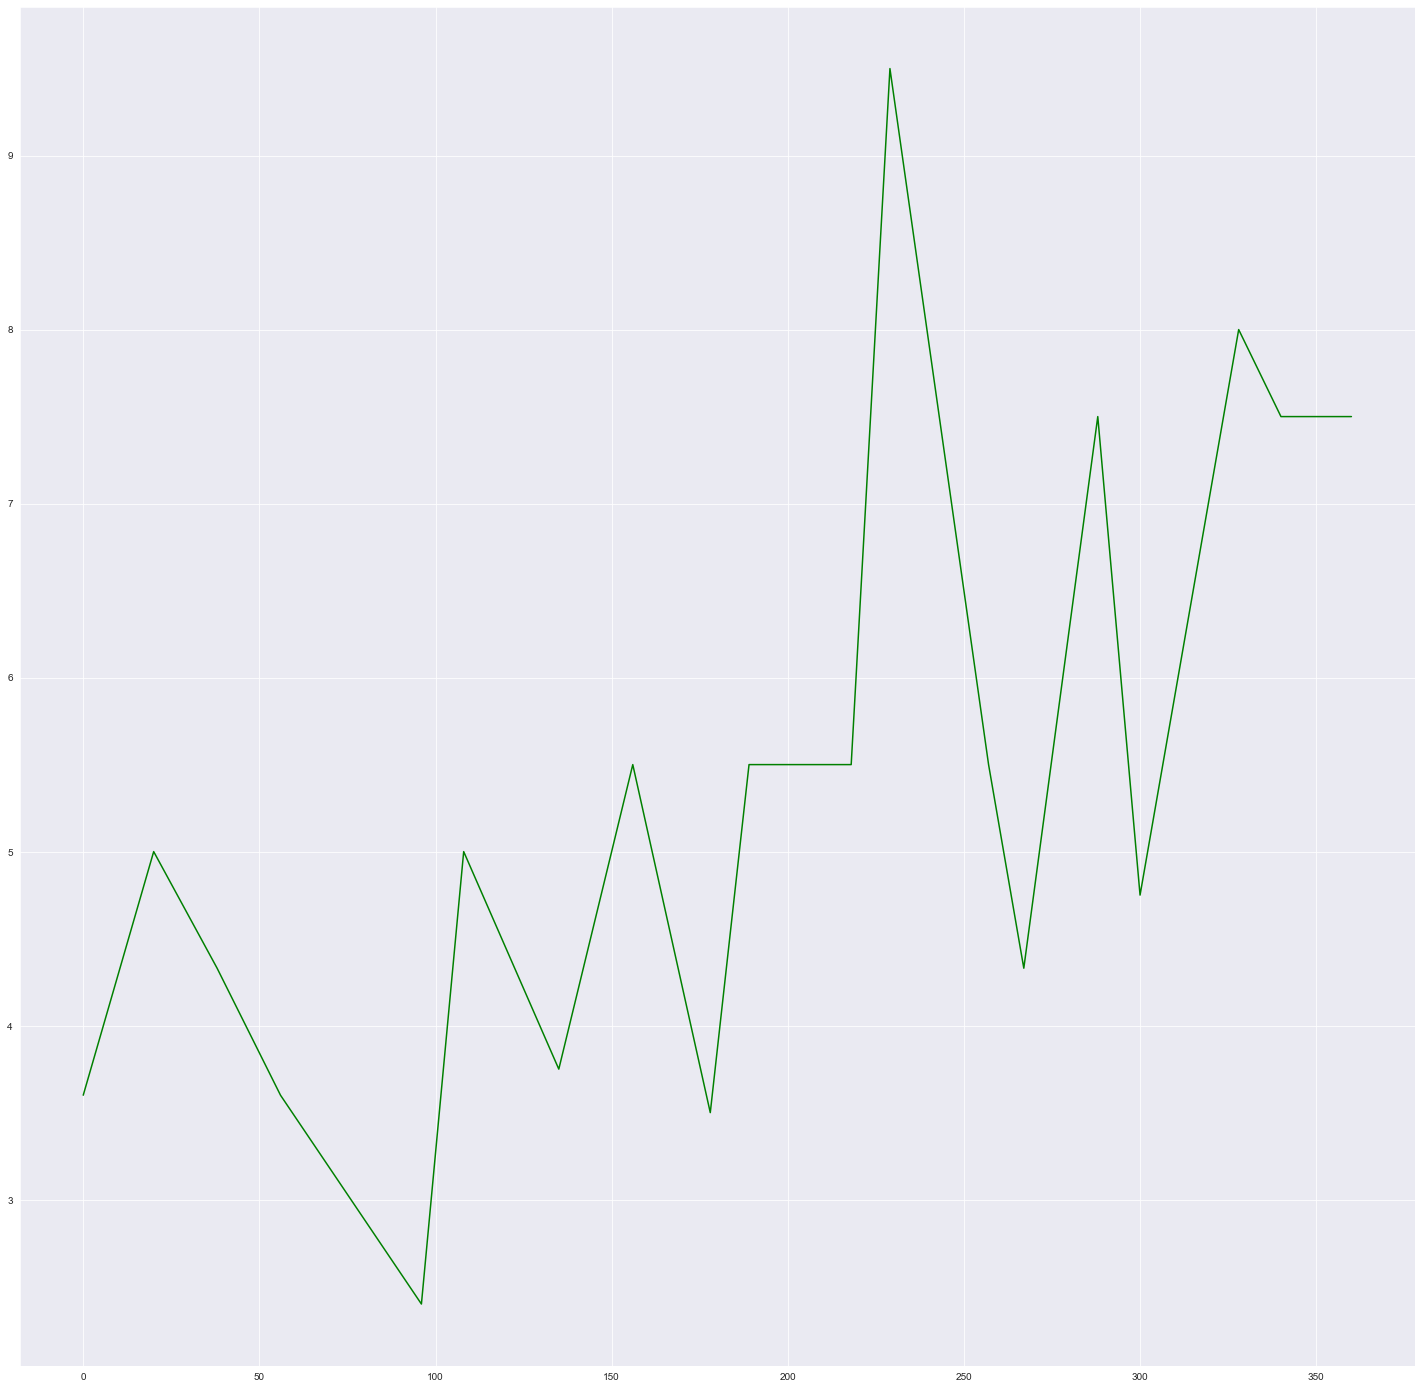

In [119]:
plt.plot(foot_odds_analysis["B365A"],color = "green")

**Conclusion :** Nous avons créé un outil rapide d'analyse des cotes des paris sportifs afin d'essayer de faire émerger des tendances. Nous n'avons pas vraiment réussi. 

## Creation of a Final Ranking

Nous allons essayer d'établir le classement final de la Ligue 1 2007-2008, cela nous permettra peut être de faire émerger de nouveaux questionnements. 

Nous l'établirons en fonction du nombres de points, en cas d'égalité nous utiliserons le nombre de buts marqués pour différencier les équipes. 

Tout d'abord, nous cherchons à regrouper les données des dataframes regroupant les résultats à l'extérieur et ceux à domicile.

In [43]:
global_foot = Away_Results.merge(Home_Results,how = 'left',left_on = 'AwayTeam',right_on = 'HomeTeam')

In [44]:
def nombre_points_domicile (x):
    result = 3*x["Home Victory"]+x["Home_nul"]
    return result
global_foot["Total_Points_Domicile"]=global_foot.apply(lambda row: nombre_points_domicile(row), axis = 1)

In [45]:
def nombre_points_extérieur (x):
    result = 3*x["Away Victory"]+x["Away Nul"]
    return result
global_foot["Total_Points_Extérieur"]=global_foot.apply(lambda row: nombre_points_extérieur(row), axis = 1)

Créons maintenant un cumul des points et des buts afin d'établir par la suite le classement final de la Ligue 1 2007-2008. 

In [46]:
def nombre_points_total (x):
    result = x.Total_Points_Domicile+x.Total_Points_Extérieur
    return result
global_foot["Total_Points"]=global_foot.apply(lambda row: nombre_points_total(row), axis = 1)

In [47]:
def total_goal (x):
    result = x["Total Goal_x"]+x["Total Goal_y"]
    return result
global_foot["Total_Goal"]=global_foot.apply(lambda row: total_goal(row), axis = 1)

In [48]:
global_foot.sort_values(by = ['Total_Points','Total_Goal'],inplace = True,ascending = False)

In [49]:
global_foot

,AwayTeam,Away Victory,Away Defeat,Away Nul,Total Goal_x,Total Shoot_x,On Target_x,Goal Mi-Temps_x,Total Fautes_x,Total Jaune_x,...,On Target_y,Goal Mi-Temps_y,Total Fautes_y,Total Jaune_y,Total Rouge_y,Total Corner_y,Total_Points_Domicile,Total_Points_Extérieur,Total_Points,Total_Goal
7,Lyon,10,6,3,30,238,86,19,313,29,...,111,18,294,30,1,91,46,33,79,74
1,Bordeaux,9,5,5,27,176,64,9,342,42,...,85,17,349,30,1,87,43,32,75,65
8,Marseille,6,5,8,24,233,69,14,336,35,...,105,19,291,21,1,109,36,26,62,58
11,Nancy,2,7,10,13,208,71,8,373,41,...,93,11,341,22,1,128,44,16,60,44
14,Rennes,6,5,8,20,197,67,9,358,28,...,97,11,301,29,0,112,32,26,58,47
16,St Etienne,4,11,4,17,249,76,11,351,41,...,110,14,310,26,1,83,42,16,58,47
5,Lille,5,3,11,16,257,82,8,394,32,...,105,19,346,28,3,102,31,26,57,45
12,Nice,5,5,9,15,206,77,3,294,30,...,86,10,344,38,1,83,31,24,55,35
3,Le Mans,5,9,5,23,254,83,9,365,41,...,81,11,342,24,3,87,33,20,53,46
6,Lorient,3,7,9,14,164,61,6,310,23,...,68,9,254,15,0,96,34,18,52,32


**Conclusion :** Nous pouvons remarquer que Lyon est l'équipe qui a gagné le championnat, suivi de Bordeaux et Marseille.

## Creation of a Global Dataset of Football Data

Dans la partie précédente, nous avons pu créer un dataset global mais structuré assez brutement. Nous n'avions pas besoin de plus pour notre analyse.

Cependant pour la suite du travail, nous allons sans aucun doute avoir besoin d'un dataset global récapitulant l'intégralité des données par équipe. Ce dernier devra être le plus propre possible. Nous allons donc le créer dans la suite de ce notebook. 

In [50]:
def select_data(data,labelsList):
    if len(labelsList)==0:
        return(data)
    else:
        return(select_data(data.drop(labelsList.pop(0),axis='columns'),labelsList))

def create_team_data(matchesData):
    
    def list_teams(matchesData):
        teamsList = []
        matchResumes = select_data(matchesData,["Date","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","B365H","B365D","B365A"]).values
        for match in matchResumes:
            if match[0] not in teamsList:
                teamsList.append(match[0])
            if match[1] not in teamsList:
                teamsList.append(match[1])
        return(teamsList)
    
    teamsList = list_teams(matchesData)
    
    def count_matches(matchesData,teamsList):
        matchesCount = []
        matchResumes = select_data(matchesData,["Date","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","B365H","B365D","B365A"]).values
        for team in teamsList:
            count = 0
            for match in matchResumes:
                if match[0]==team or match[1]==team:
                    count+=1
            matchesCount.append(count)
        return(matchesCount)
    
    matchesCount = count_matches(matchesData,teamsList)
    
    def stats_home(matchesData,teamsList):
        goals = []
        victories = []
        losses = []
        draws = []
        shots = []
        shotsOnTarget = []
        faults = []
        corners = []
        yCards = []
        rCards = []
        matchResumes = select_data(matchesData,["Date","AwayTeam","FTAG","HTR","HTHG","HTAG","AS","AST","AF","AC","AY","AR","B365H","B365D","B365A"]).values
        for team in teamsList:
            goalCount = 0
            vCount = 0
            lCount = 0
            dCount = 0
            shotCount = 0
            sotCount = 0
            faultCount = 0
            cornerCount = 0
            yCount = 0
            rCount = 0
            for match in matchResumes:
                if match[0]==team:
                    goalCount+=match[1]
                    shotCount+=match[3]
                    sotCount+=match[4]
                    faultCount+=match[5]
                    cornerCount+=match[6]
                    yCount+=match[7]
                    rCount+=match[8]
                    if match[2]=='H':
                        vCount+=1
                    elif match[2]=='A':
                        lCount+=1
                    elif match[2]=='D':
                        dCount+=1
            goals.append(goalCount)
            victories.append(vCount)
            losses.append(lCount)
            draws.append(dCount)
            shots.append(shotCount)
            shotsOnTarget.append(sotCount)
            faults.append(faultCount)
            corners.append(cornerCount)
            yCards.append(yCount)
            rCards.append(rCount)
        return(goals,victories,losses,draws,shots,shotsOnTarget,faults,corners,yCards,rCards)
    
    hGoals, hVictories, hLosses, hDraws, hShots, hShotsOnTarget, hFaults, hCorners, hYCards, hRCards = stats_home(matchesData,teamsList)
    
    def stats_away(matchesData,teamsList):
        goals = []
        victories = []
        losses = []
        draws = []
        shots = []
        shotsOnTarget = []
        faults = []
        corners = []
        yCards = []
        rCards = []
        matchResumes = select_data(matchesData,["Date","HomeTeam","FTHG","HTR","HTHG","HTAG","HS","HST","HF","HC","HY","HR","B365H","B365D","B365A"]).values
        for team in teamsList:
            goalCount = 0
            vCount = 0
            lCount = 0
            dCount = 0
            shotCount = 0
            sotCount = 0
            faultCount = 0
            cornerCount = 0
            yCount = 0
            rCount = 0
            for match in matchResumes:
                if match[0]==team:
                    goalCount+=match[1]
                    shotCount+=match[3]
                    sotCount+=match[4]
                    faultCount+=match[5]
                    cornerCount+=match[6]
                    yCount+=match[7]
                    rCount+=match[8]
                    if match[2]=='H':
                        vCount+=1
                    elif match[2]=='A':
                        lCount+=1
                    elif match[2]=='D':
                        dCount+=1
            goals.append(goalCount)
            victories.append(vCount)
            losses.append(lCount)
            draws.append(dCount)
            shots.append(shotCount)
            shotsOnTarget.append(sotCount)
            faults.append(faultCount)
            corners.append(cornerCount)
            yCards.append(yCount)
            rCards.append(rCount)
        return(goals,victories,losses,draws,shots,shotsOnTarget,faults,corners,yCards,rCards)
    
    aGoals, aVictories, aLosses, aDraws, aShots, aShotsOnTarget, aFaults, aCorners, aYCards, aRCards = stats_away(matchesData,teamsList)

    labelDict = {"Team":teamsList,"TG":matchesCount,"THG":hGoals,"TAG":aGoals,"THV":hVictories,"THL":hLosses,"THD":hDraws,"TAV":aVictories,"TAL":aLosses,"TAD":aDraws,"THS":hShots,"TAS":aShots,"THST":hShotsOnTarget,"TAST":aShotsOnTarget,"THF":hFaults,"TAF":aFaults,"THC":hCorners,"TAC":aCorners,"THY":hYCards,"TAY":aYCards,"THR":hRCards,"TAR":aRCards}
    
    teamData = pd.DataFrame(labelDict)
    
    return(teamData)
data = create_team_data(foot)

In [51]:
def create_global_team_data(teamData):
    
    def total_stats(teamData):
        teamsList=[]
        matchesCount=[]
        goals=[]
        victories=[]
        losses=[]
        draws=[]
        shots=[]
        shotsOnTarget=[]
        faults=[]
        corners=[]
        yCards=[]
        rCards=[]
        for team in teamData.values:
            teamsList.append(team[0])
            matchesCount.append(team[1])
            goals.append(team[2]+team[3])
            victories.append(team[4]+team[7])
            losses.append(team[5]+team[8])
            draws.append(team[6]+team[9])
            shots.append(team[10]+team[11])
            shotsOnTarget.append(team[12]+team[13])
            faults.append(team[14]+team[15])
            corners.append(team[16]+team[17])
            yCards.append(team[18]+team[19])
            rCards.append(team[20]+team[21])
        return(teamsList,matchesCount,goals,victories,losses,draws,shots,shotsOnTarget,faults,corners,yCards,rCards)
    
    teamsList, matchesCount, goals, victories, losses, draws, shots, shotsOnTarget, faults, corners, yCards, rCards = total_stats(teamData)
    
    labelDict = {"Team":teamsList,"TGames":matchesCount,"TGoals":goals,"TV":victories,"TL":losses,"TD":draws,"TS":shots,"TST":shotsOnTarget,"TF":faults,"TC":corners,"TY":yCards,"TR":rCards}

    globalTeamData = pd.DataFrame(labelDict)
    
    return(globalTeamData)

global_agregated_football_df = create_global_team_data(data)

In [52]:
global_agregated_football_df

,Team,TGames,TGoals,TV,TL,TD,TS,TST,TF,TC,TY,TR
0,Bordeaux,38,65,18,11,9,421,149,691,163,72,5
1,Lens,38,43,18,7,13,459,148,601,204,57,3
2,Caen,38,48,19,7,12,446,159,682,181,61,2
3,Nice,38,35,13,9,16,444,163,638,142,68,2
4,Lille,38,45,11,9,18,543,187,740,196,60,4
5,Lorient,38,32,16,6,16,399,129,564,179,38,0
6,Monaco,38,40,17,13,8,462,161,745,174,81,4
7,St Etienne,38,47,23,5,10,584,186,661,167,67,4
8,Paris SG,38,37,12,13,13,465,163,564,217,56,2
9,Sochaux,38,34,10,14,14,583,186,680,213,74,1


**Conclusion :** Nous venons donc de créer un dataset global, ce dernier sera utilisé dans la suite. 

## Creation of a New Dataframe with Month Dates

Nous créeons un dataframe agrégé avec les mois de dates, par équipe. Une notion de domicile/extérieur a été affecté. Nous utiliserons cela dans une seconde analyse pour tenter d'évaluer l'influence de la date sur les performances des équipes.

In [53]:
foot_month = foot.copy()

In [54]:
# Creation de la date du mois
def mois(x):
    result = int(x.Date[3:5])
    return result
foot_month["Mois"]=foot_month.apply(lambda row: mois(row), axis = 1)

In [55]:
foot_month = foot_month.drop(["Date"],axis = 1)

In [56]:
def victoire_nul(x):
    if x.FTR == "H" :
        result = 1
    elif x.FTR == "A":
        result = -1
    else : 
        result = 0
    return result
foot_month["Victoire_Nul"]=foot_month.apply(lambda row: victoire_nul(row), axis = 1)

In [57]:
foot_month = foot_month.drop(["B365H","B365D","B365A","FTR","HTR"],axis = 1)

In [58]:
foot_month

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Mois,Victoire_Nul
0,Bordeaux,Lens,1,0,1,0,13,4,4,2,21,19,4,4,3,2,0,1,8,1
1,Caen,Nice,1,0,0,0,16,14,6,4,17,15,2,3,1,1,0,0,8,1
2,Lille,Lorient,0,0,0,0,6,5,2,3,26,19,2,2,1,1,0,0,8,0
3,Monaco,St Etienne,1,1,1,0,16,19,5,6,3,3,5,6,3,3,0,0,8,0
4,Paris SG,Sochaux,0,0,0,0,11,8,10,5,13,17,5,9,2,1,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,2,3,1,1,18,15,4,8,21,26,7,6,1,3,0,0,5,-1
376,Nice,Caen,3,1,1,1,14,15,5,7,12,14,4,11,0,1,0,0,5,1
377,Sochaux,Paris SG,1,2,0,1,17,9,4,2,16,19,6,5,2,2,0,0,5,-1
378,St Etienne,Monaco,4,0,3,0,20,3,10,0,17,12,2,2,0,1,0,0,5,1


In [59]:
foot_month_2 = foot_month[foot_month["Victoire_Nul"]==1]
foot_month_2 = foot_month.groupby(["HomeTeam","Mois"]).agg({"Victoire_Nul":"count","FTHG":"sum","FTAG":"sum","HTHG":"sum","HTAG":"sum","HS":"sum","AS":"sum","HST":"sum","AST":"sum","HF":"sum","AF":"sum","HC":"sum","AC":"sum","HY":"sum","AY":"sum","AR":"sum","HR":"sum"}).reset_index()

In [60]:
foot_month_3 = foot_month[foot_month["Victoire_Nul"]==0]
foot_month_3 = foot_month.groupby(["HomeTeam","Mois"]).agg({"Victoire_Nul":"count","FTHG":"sum","FTAG":"sum","HTHG":"sum","HTAG":"sum","HS":"sum","AS":"sum","HST":"sum","AST":"sum","HF":"sum","AF":"sum","HC":"sum","AC":"sum","HY":"sum","AY":"sum","AR":"sum","HR":"sum"}).reset_index()

In [61]:
foot_month_4 = foot_month[foot_month["Victoire_Nul"]== -1]
foot_month_4 = foot_month.groupby(["HomeTeam","Mois"]).agg({"Victoire_Nul":"count","FTHG":"sum","FTAG":"sum","HTHG":"sum","HTAG":"sum","HS":"sum","AS":"sum","HST":"sum","AST":"sum","HF":"sum","AF":"sum","HC":"sum","AC":"sum","HY":"sum","AY":"sum","AR":"sum","HR":"sum"}).reset_index()

In [62]:
foot_month_final = foot_month_2.merge(foot_month_3, how = "left", right_on = ['HomeTeam','Mois'], left_on = ['HomeTeam','Mois'])

In [63]:
foot_month_final = foot_month_final.merge(foot_month_4,how = "left", right_on = ['HomeTeam','Mois'], left_on = ['HomeTeam','Mois'])

In [64]:
def total_goal_home_month (x):
    result = x.FTHG_x+x.FTHG_y+x.FTHG
    return result 
foot_month_final["TotalGoalHome"]=foot_month_final.apply(lambda row: total_goal_home_month(row), axis = 1)

In [65]:
def total_goal_away_month (x):
    result = x.FTAG_x+x.FTAG_y+x.FTAG
    return result 
foot_month_final["TotalGoalAway"]=foot_month_final.apply(lambda row: total_goal_away_month(row), axis = 1)

In [66]:
def total_goal_home_MT_month (x):
    result = x.HTHG_x+x.HTHG_y+x.HTHG
    return result 
foot_month_final["TotalGoalHomeMT"]=foot_month_final.apply(lambda row: total_goal_home_MT_month(row), axis = 1)

In [67]:
def total_goal_away_MT_month (x):
    result = x.HTAG_x+x.HTAG_y+x.HTAG
    return result 
foot_month_final["TotalGoalAwayMT"]=foot_month_final.apply(lambda row: total_goal_away_MT_month(row), axis = 1)

In [68]:
def total_shoot_home_month (x):
    result = x.HS_x+x.HS_y+x.HS
    return result 
foot_month_final["TotalShootHome"]=foot_month_final.apply(lambda row: total_shoot_home_month(row), axis = 1)

In [69]:
def total_shoot_away_month (x):
    result = x.AS_x+x.AS_y+x.AS
    return result 
foot_month_final["TotalShootAway"]=foot_month_final.apply(lambda row: total_shoot_away_month(row), axis = 1)

In [70]:
def total_shoot_target_home_month (x):
    result = x.HST_x+x.HST_y+x.HST
    return result 
foot_month_final["TotalShootTargetHome"]=foot_month_final.apply(lambda row: total_shoot_target_home_month(row), axis = 1)

In [71]:
def total_shoot_target_away_month (x):
    result = x.AST_x+x.AST_y+x.AST
    return result 
foot_month_final["TotalShootTargetAway"]=foot_month_final.apply(lambda row: total_shoot_target_away_month(row), axis = 1)

In [72]:
def total_fouls_home_month (x):
    result = x.HF_x+x.HF_y+x.HF
    return result 
foot_month_final["TotalFoulsHome"]=foot_month_final.apply(lambda row: total_fouls_home_month(row), axis = 1)

In [73]:
def total_fouls_away_month (x):
    result = x.AF_x+x.AF_y+x.AF
    return result 
foot_month_final["TotalFoulsAway"]=foot_month_final.apply(lambda row: total_fouls_away_month(row), axis = 1)

In [74]:
def total_corners_away_month (x):
    result = x.AC_x+x.AC_y+x.AC
    return result 
foot_month_final["TotalCornersAway"]=foot_month_final.apply(lambda row: total_corners_away_month(row), axis = 1)

In [75]:
def total_corners_home_month (x):
    result = x.HC_x+x.HC_y+x.HC
    return result 
foot_month_final["TotalCornersHome"]=foot_month_final.apply(lambda row: total_corners_home_month(row), axis = 1)

In [76]:
def total_yellow_away_month (x):
    result = x.AY_x+x.AY_y+x.AY
    return result 
foot_month_final["TotalYellowAway"]=foot_month_final.apply(lambda row: total_yellow_away_month(row), axis = 1)

In [77]:
def total_yellow_home_month (x):
    result = x.HY_x+x.HY_y+x.HY
    return result 
foot_month_final["TotalYellowHome"]=foot_month_final.apply(lambda row: total_yellow_home_month(row), axis = 1)

In [78]:
def total_red_home_month (x):
    result = x.HR_x+x.HR_y+x.HR
    return result 
foot_month_final["TotalRedHome"]=foot_month_final.apply(lambda row: total_red_home_month(row), axis = 1)

In [79]:
def total_red_away_month (x):
    result = x.AR_x+x.AR_y+x.AR
    return result 
foot_month_final["TotalRedAway"]=foot_month_final.apply(lambda row: total_red_home_month(row), axis = 1)

In [80]:
foot_month_final = foot_month_final.drop(["FTHG_x","FTHG_y","FTHG","FTAG_x","FTAG_y","FTAG","HTHG_x","HTHG_y","HTHG","HTAG_x","HTAG_y","HTAG","HS_x","HS_y","HS","AS_x","AS_y","AS","HST_x","HST_y","HST","AST_x","AST_y","AST","HF_x","HF_y","HF","AF_x","AF","AF_y","AC_x","AC_y","AC","HC_x","HC_y","HC","AY_x","AY_y","AY","HY_x","HY_y","HY","HR_x","HR_y","HR","AR_x","AR_y","AR"],axis=1).copy()
foot_month_final


,HomeTeam,Mois,Victoire_Nul_x,Victoire_Nul_y,Victoire_Nul,TotalGoalHome,TotalGoalAway,TotalGoalHomeMT,TotalGoalAwayMT,TotalShootHome,...,TotalShootTargetHome,TotalShootTargetAway,TotalFoulsHome,TotalFoulsAway,TotalCornersAway,TotalCornersHome,TotalYellowAway,TotalYellowHome,TotalRedHome,TotalRedAway
0,Auxerre,1,2,2,2,3,3,3,0,66,...,15,18,105,114,18,36,9,18,0,0
1,Auxerre,2,1,1,1,3,0,0,0,42,...,12,12,36,69,12,21,6,3,0,0
2,Auxerre,3,2,2,2,3,9,3,0,75,...,33,36,135,78,66,42,6,15,0,0
3,Auxerre,4,2,2,2,0,3,0,3,63,...,21,18,69,90,36,36,12,9,0,0
4,Auxerre,5,2,2,2,9,9,3,6,57,...,15,18,111,63,12,27,6,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Valenciennes,8,3,3,3,24,9,12,6,99,...,51,27,108,111,33,42,9,12,0,0
196,Valenciennes,9,2,2,2,3,0,3,0,75,...,12,12,132,111,18,30,18,6,6,6
197,Valenciennes,10,1,1,1,0,0,0,0,42,...,18,6,63,51,12,9,3,0,0,0
198,Valenciennes,11,1,1,1,9,0,6,0,45,...,12,12,45,39,18,9,6,6,0,0


**Conclusion :** Nous venons de créer un dataframe agrégé par équipe avec les numéros de mois et une notion de Domicile et d'Extérieur.

## Conclusion of the Statistical Analysis and Dataframe Transformation

**Ici ce termine la phase d'analyse statistiques.** 

Nous avons pu faire émerger que : 

-Le dataset d'origine contenait de nombreuses valeurs extrêmes (Cf Analyse en Box Plot). 

-Après retraitement des données, il est apparu que les équipes de Ligue 1 étaient plus performantes à domicile qu'à l'extérieur (cf Analyse par équipe). Ce retraitement nous a aussi permis de voir que toutes les équipes n'étaient pas égales, que certaines étaient plus fortes que d'autres.

-Nous avons rapidement créé un outil d'analyse des cotes des paris sportifs, celui-ci ne nous a pas permis de dégager de tendances particulières. 

-Nous avons aussi établis un classement de la Ligue 1 pour l'année 2007/2008. Ce dernier ne nous a pas réellement apporté d'informations supplémentaires. 

-Nous avons aussi créé un dataset dans lequel les données sont résumées et simplifiées. Cela nous sera sans doute utile pour nos analyses futures. 

-Un dernier dataset a été créé, il contient une simplification des données et une agrégation par mois et par équipe avec une distinction domicile et extérieur. 

# Principal Component Analysis and Clustering

Nous allons commencer ici l'ACP et le clustering, cette méthode à pour but de faire émerger des corrélations entre les différentes variables. 

## First PCA : Without Dates and Odds (Dataset 1 : foot_global)

Réalisons ce premier test PCA. Il sera essentiellement réalisé en utilisant la librairie sklearn.

### Plotting Correlation

In [81]:
foot_global = global_agregated_football_df
data_corr = foot_global.corr()

Nous avons repris la fonction que vous avez utilisé dans le LAB_2. Cette dernière nous a paru pertinente pour déterminer les différentes corrélations. 

In [84]:
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    seaborn.heatmap(corr, mask=mask, cmap=cmap)
    plt.rc('figure', figsize=[8, 8])

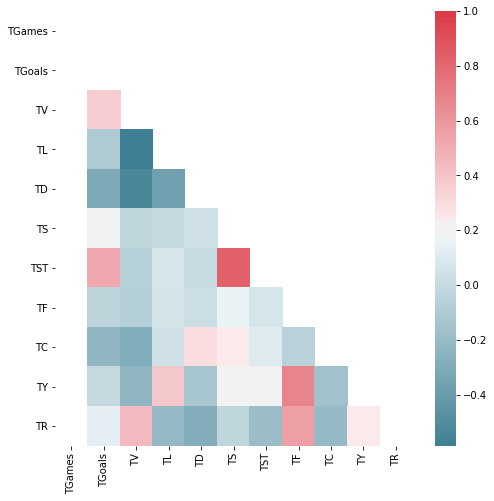

In [85]:
plot_corr(data_corr)

**Conclusion :** Nous pouvons remarquer différentes corrélations : 

Corrélation proportionnelle : 

-Les variables TS (nombre de tirs) et TST (nombre de tirs cadrés) semblent fortement corrélées. 

-Le nombre de buts (TGoals) et le nombre de victoire (TV) semblent aussi corrélées.

-Le nombre de buts (TGoals) et le nombre de tirs cadrés (TST) semblent eux aussi corrélées. 

-Le nombre de fautes (TF) et les cartons jaunes (TY) et rouges (TR) semblent corrélées deux à deux. 

-On observe aussi une corrélation légère entre le nombre de cartons jaunes (TY) et le nombre de cartons rouges (TR). 

-Le nombre de victoires (TV) et le nombre de cartons rouges (TR) semblent aussi corrélées.


Corrélation inverse :

-Le nombre de victoires (TV) qui semble être inversement proportionnel avec le nombre de défaite (TL) et le nombre de nuls (TD).

-On observe aussi des corrélations inverses avec les nombres de buts et le nombre de défaite et de nul. 

-Nous pouvons remarquer quelques chose de surprenant, plus nous avons de corners (TC), moins nous gagnons (TV). 


**Dans la suite de notre travail, nous ne nous intéresserons pas nécessaires à l'ensemble des corrélations précédemment citées.**

### Scalling before PCA 

Avant de lancer notre algorithme de PCA, nous allons harmoniser/standardiser les données en centrant et réduisant.

In [86]:
from sklearn.preprocessing import StandardScaler
foot_global = foot_global.drop(["Team","TGames"],axis = 1)
# Nous avons enlever les équipes car se sont des strings et le nombre de match joués car il est le même pour tous. 

In [87]:
X = foot_global.values # Avec cette fonction nous récupérons sous forme d'array numpy l'ensemble des valeurs
# de notre dataframe.
std_scale = StandardScaler().fit(X)
foot_scaled = std_scale.transform(X)

**Conclusion :** Nous venons de récupérer sous forme d'array Numpy l'ensemble des valeurs normalisées du dataframe récapitulatif (foot_global). Nous allons donc pouvoir attaquer l'ACP. 

### Realizing the PCA

In [88]:
from sklearn.decomposition import PCA

In [89]:
foot_pca = PCA().fit(foot_scaled)
foot_proj = foot_pca.transform(foot_scaled)

Maintenant que nous avons fait tourner l'algorithme d'ACP, une autre analyse commence : **il faut déterminer les composantes principales.** Pour cela, nous allons **tracer une courbe** indiquant le **nombre de vecteurs obtenus** par la méthode ACP et le **pourcentage cumulé de la varriance qu'ils expliquent**.

In [90]:
seaborn.set_style('darkgrid')

Text(0, 0.5, 'Pourcentages Cumulés')

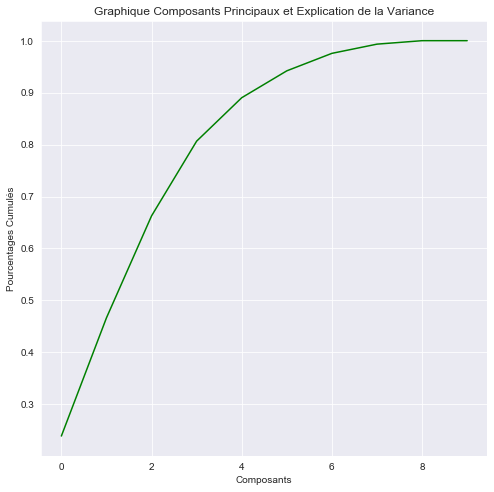

In [91]:
plt.plot(np.cumsum(foot_pca.explained_variance_ratio_), color = 'green')
plt.title("Graphique Composants Principaux et Explication de la Variance")
plt.xlabel("Composants")
plt.ylabel("Pourcentages Cumulés")

**Conclusion :** Nous remarquons que les 4 premiers composants expliquent 90% de la variance cumulée.

Nous allons donc nous intéresser plus en détails à ces 4 premiers composants. 

### Plotting the Points in the New Space Defined by PCA's Vectors

Maintenant, nous allons regarder quels composants semblent être la principale explication des vecteurs précédemment obtenus avec l'ACP. Faire cela, nous aidera sans aucun doute pour notre clustering, prochaine étape de ce TP.

In [92]:
# On récupère l'intégralité des colonnes restantes du Dataframe
list_colums = list(foot_global.columns)
list_colums

['TGoals', 'TV', 'TL', 'TD', 'TS', 'TST', 'TF', 'TC', 'TY', 'TR']

In [93]:
# First Component

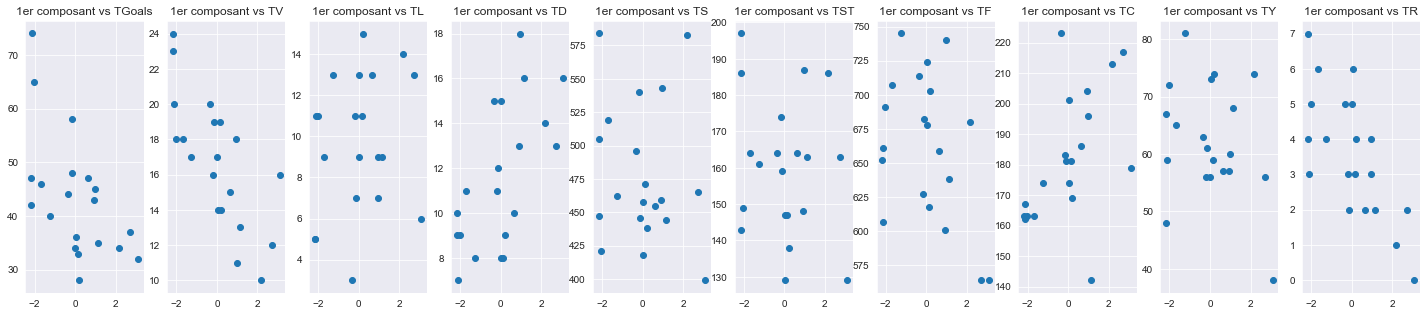

In [94]:
_, axes = plt.subplots(ncols=10, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axes, list_colums)):
    ax.scatter(foot_proj[:,0], foot_global[col])
    ax.set_title(f'1er composant vs {col}')

**Conclusion :** Le nombre de cartons rouges et de victoires semblent corrélés inversement avec le premier composant.

Le nombre de corner semble corrélé positivement avec le premier composant. 

In [95]:
# Second Component

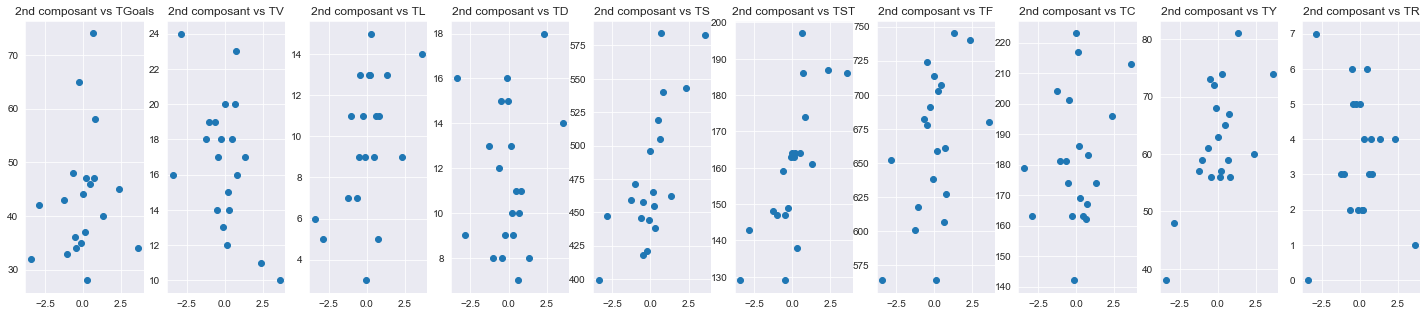

In [96]:
_, axes = plt.subplots(ncols=10, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axes, list_colums)):
    ax.scatter(foot_proj[:,1], foot_global[col])
    ax.set_title(f'2nd composant vs {col}')

**Conclusion :** Le nombre de tirs et de tirs cadrés semblent corrélés avec le second composant.

In [97]:
# Third Component

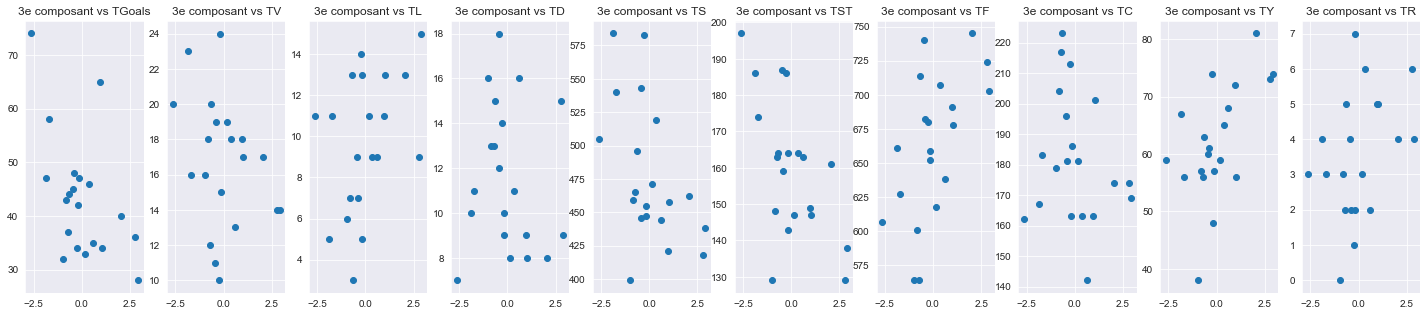

In [98]:
_, axes = plt.subplots(ncols=10, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axes, list_colums)):
    ax.scatter(foot_proj[:,2], foot_global[col])
    ax.set_title(f'3e composant vs {col}')

**Conclusion :** Le 3e composant semble corrélé proportionnellement avec le nombre de fautes.

In [99]:
# Fourth Component

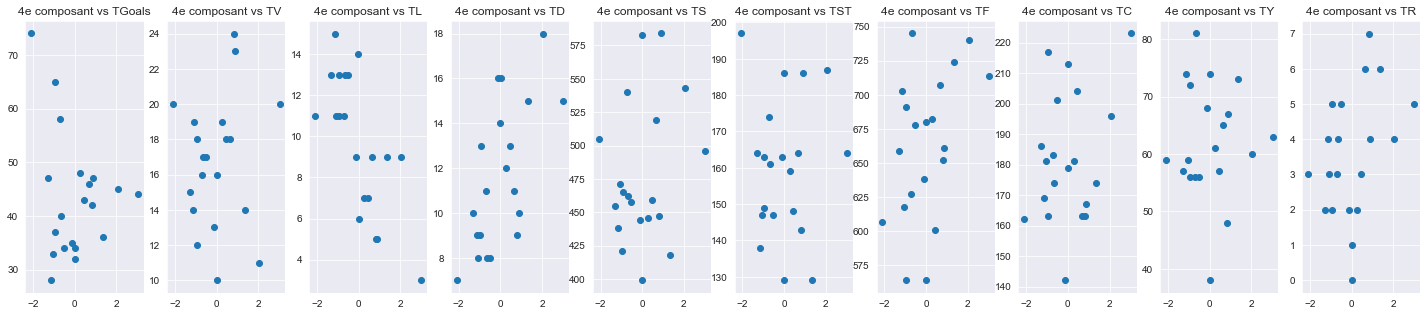

In [100]:
_, axes = plt.subplots(ncols=10, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axes, list_colums)):
    ax.scatter(foot_proj[:,3], foot_global[col])
    ax.set_title(f'4e composant vs {col}')

**Conclusion :** Le 4e composant semble corrélé proportionnellement avec le nombre de fautes.

### Correlation Graph

In [101]:
components=foot_pca.components_

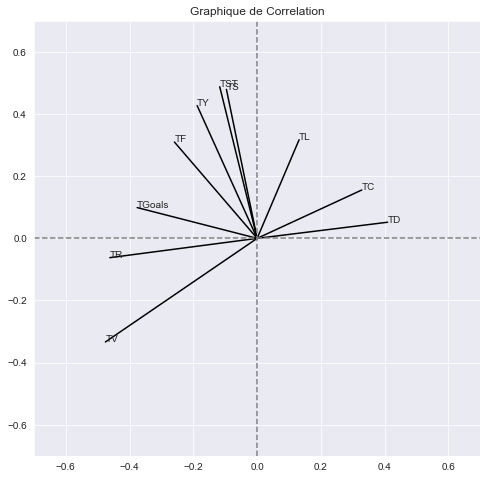

In [102]:
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, foot_global.columns[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)
plt.title("Graphique de Correlation")
plt.rc('figure', figsize=[25, 25])

**Conclusion :** Logiquement, le nombre de victoires et de défaites sont corrélés inversement. Il en va de même pour le nombre de victoires et le nombre de matchs nuls. 

Le nombre de tirs et de tirs cadrés sont fortement corrélés. 

Bizarrement, le nombre de tirs/tirs cadrés et le nombre de buts ne semble pas très corrélés (angle très grands). Il pourrait être intéressant de faire un clustering sur ces données afin de voir si certaines équipes tirent beaucoup mais marquent peu.  

Le nombre de buts et de carton rouges sont relativement corrélés, l'angle n'a pas un degré très grand. 

**Nous servirons de toutes les analyses faites précédemment pour notre premier clustering**. 

## Global clustering of the First Dataset

Nous allons tout d'abord évaluer s'il est possible de ranger les équipes par groupes selon leurs résultats dans toutes les variables. Pour cela on regarde le score de silhouette sur une méthode des kmeans avec distance euclidienne :

In [122]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,]
for n in range_n_clusters:
    kmeans_foot = KMeans(n_clusters=n, n_init=100).fit(foot_global) 
    cluster_labels = kmeans_foot.labels_ 
    silhouette_avg = silhouette_score(foot_global, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.3104613588131335
For n = 3 Silhouette_score: 0.3306667158916292
For n = 4 Silhouette_score: 0.3142176954645868
For n = 5 Silhouette_score: 0.3222462495500639
For n = 6 Silhouette_score: 0.2885520463367194
For n = 7 Silhouette_score: 0.2853771388531462
For n = 8 Silhouette_score: 0.2408998378516387
For n = 9 Silhouette_score: 0.22426579876932343
For n = 10 Silhouette_score: 0.2173719144062972


**Conclusion :** Avec un score de silhouette valant au maximum 33%, on ne peut pas vraiment conclure que cette approche qualifie le jeu de données. On va donc s'intéresser à des groupements de données plus isolés.

## Local clustering of the First Dataset

Le but est de regarder plus en détail des relations de décorrélation qui nous ont parues étonnantes lors de la phase d'ACP.

### Shoots and Goals

Regardons tout d'abord l'étonnante **absence de lien entre le nombre de tirs et le nombre de buts**.

In [126]:
foot_global_clustering1 = foot_global.drop(["TV","TL","TD","TST","TF","TC","TY","TR"],axis=1)
for n in range_n_clusters:
    kmeans_foot = KMeans(n_clusters=n, n_init=100).fit(foot_global_clustering1) 
    cluster_labels = kmeans_foot.labels_ 
    silhouette_avg = silhouette_score(foot_global_clustering1, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6201470073969759
For n = 3 Silhouette_score: 0.5959288593796939
For n = 4 Silhouette_score: 0.5329463843478905
For n = 5 Silhouette_score: 0.5215595323817905
For n = 6 Silhouette_score: 0.3955943911039101
For n = 7 Silhouette_score: 0.41041592146983197
For n = 8 Silhouette_score: 0.4038529516574786
For n = 9 Silhouette_score: 0.39325071194036276
For n = 10 Silhouette_score: 0.36038942631357773


Après évaluation du score de silhouette, il semble que les équipes puissent être réparties en 2 groupes dans cette relation.

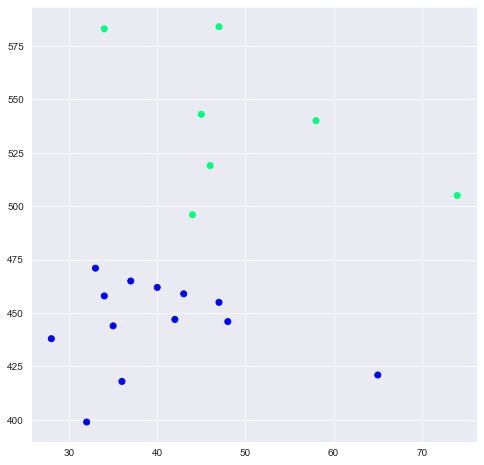

In [140]:
import matplotlib.cm as cm
kmeans_foot_clustering1 = KMeans(n_clusters=2,n_init=100).fit(foot_global_clustering1)
xGoals = foot_global_clustering1['TGoals']
yShoots = foot_global_clustering1['TS']
plt.scatter(xGoals,yShoots,c=kmeans_foot_clustering1.labels_,cmap=cm.winter)
plt.show()

**Conclusion :** Les équipes sont réparties entre des celles qui tirent peu, et celles qui tirent beaucoup. La décorrélation avec le nombre de buts est frappante : **les équipes qui tirent plus ne sont en effet pas nécessairement plus efficace**. Aussi nous remarquons qu'une des équipes marque beaucoup sans tirer beaucoup, elle est donc très précise.

### Red Cards and Victories

On s'intéresse désormais aux cartons rouges et aux victoires. **Ces deux variables sont étrangement corrélées entre elles, ainsi qu'à la première composante.** Elles sont donc très importantes.

In [141]:
foot_global_clustering2 = foot_global.drop(["TGoals","TL","TD","TS","TST","TF","TC","TY"],axis=1)
for n in range_n_clusters:
    kmeans_foot = KMeans(n_clusters=n, n_init=100).fit(foot_global_clustering2) 
    cluster_labels = kmeans_foot.labels_ 
    silhouette_avg = silhouette_score(foot_global_clustering2, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.442399752887482
For n = 3 Silhouette_score: 0.41751299255087176
For n = 4 Silhouette_score: 0.3590224854539486
For n = 5 Silhouette_score: 0.3743371335107849
For n = 6 Silhouette_score: 0.37992713506420717
For n = 7 Silhouette_score: 0.3484884254821895
For n = 8 Silhouette_score: 0.3125742131073876
For n = 9 Silhouette_score: 0.2948915241537561
For n = 10 Silhouette_score: 0.27297216531381896


On peut de nouveau diviser les équipes en deux groupes, mais il faudra relativiser compte tenu du faible score de silhouette obtenu.

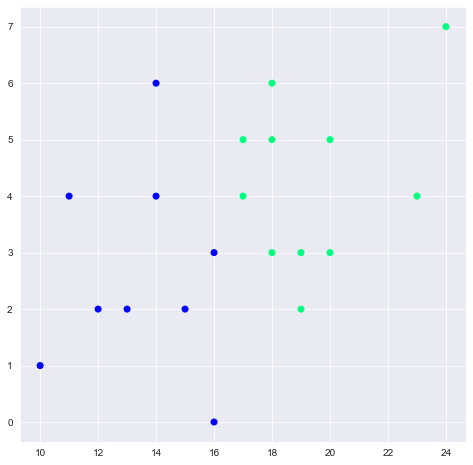

In [142]:
kmeans_foot_clustering2 = KMeans(n_clusters=2,n_init=100).fit(foot_global_clustering2)
xVictories = foot_global_clustering2['TV']
yRed = foot_global_clustering2['TR']
plt.scatter(xVictories,yRed,c=kmeans_foot_clustering2.labels_,cmap=cm.winter)
plt.show()

**Conclusion :** L'algorithme a spontanément divisé les équipes selon leur nombre de victoires. Comme on s'y attendait, **le nombre de cartons rouge ne semble pas si bien corrélé que ça avec le nombre de victoires.** 

Mais il existe une **valeur aberrante puisque l'équipe avec le plus de victoires est aussi celle qui obtient le plus de cartons**. Cela peut expliquer **pourquoi dans** la phase de **PCA** on arrivait à la **conclusion contre-intuitive que plus on a de cartons rouges, plus on gagne**.

### Corners and Victories

Enfin, intéressons-nous aux corners, une autre composante déterminante du jeu de données. **On obtenait plus tôt une conclusion étrange selon laquelle plus on obtient de corners, moins on gagne.**

In [143]:
foot_global_clustering3 = foot_global.drop(["TGoals","TL","TD","TS","TST","TF","TY","TR"],axis=1)
for n in range_n_clusters:
    kmeans_foot = KMeans(n_clusters=n, n_init=100).fit(foot_global_clustering3) 
    cluster_labels = kmeans_foot.labels_ 
    silhouette_avg = silhouette_score(foot_global_clustering3, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6201470073969759
For n = 3 Silhouette_score: 0.5959288593796939
For n = 4 Silhouette_score: 0.5329463843478905
For n = 5 Silhouette_score: 0.5215595323817905
For n = 6 Silhouette_score: 0.3955943911039101
For n = 7 Silhouette_score: 0.41041592146983197
For n = 8 Silhouette_score: 0.4038529516574786
For n = 9 Silhouette_score: 0.39325071194036276
For n = 10 Silhouette_score: 0.36038942631357773


Encore une fois, les équipes semblent pouvoir être séparées en deux groupes. 

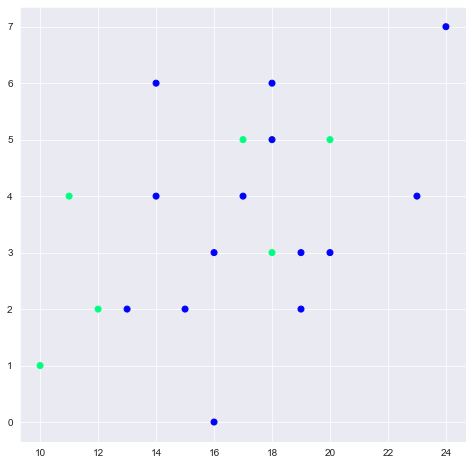

In [146]:
kmeans_foot_clustering3 = KMeans(n_clusters=2,n_init=100).fit(foot_global_clustering3)
xVictories = foot_global_clustering3['TV']
yCorners = foot_global_clustering3['TC']
plt.scatter(xVictories,yRed,c=kmeans_foot_clustering3.labels_,cmap=cm.winter)
plt.show()

**Conclusion :** Ici, impossible de comprendre comment les groupes ont été formés. On observe une limite de l'algorithme dont la cause est inconnue (surapprentissage, non-adéquation de l'algorithme?)

## Second PCA with Month Dates and Binary Victory

Dans cette partie, nous allons faire une ACP avec le second DataFrame que nous avons créé (foot_month). Nous espérons faire émerger de nouvelles corrélations entre les variables en utilisant une donnée plus proche de la donnée intialement fournie. 

Nous expliquerons moins les étapes vu que nous les avons déjà faite précédemment. 

### Plotting Correlation

In [100]:
foot_month_corr = foot_month.corr()

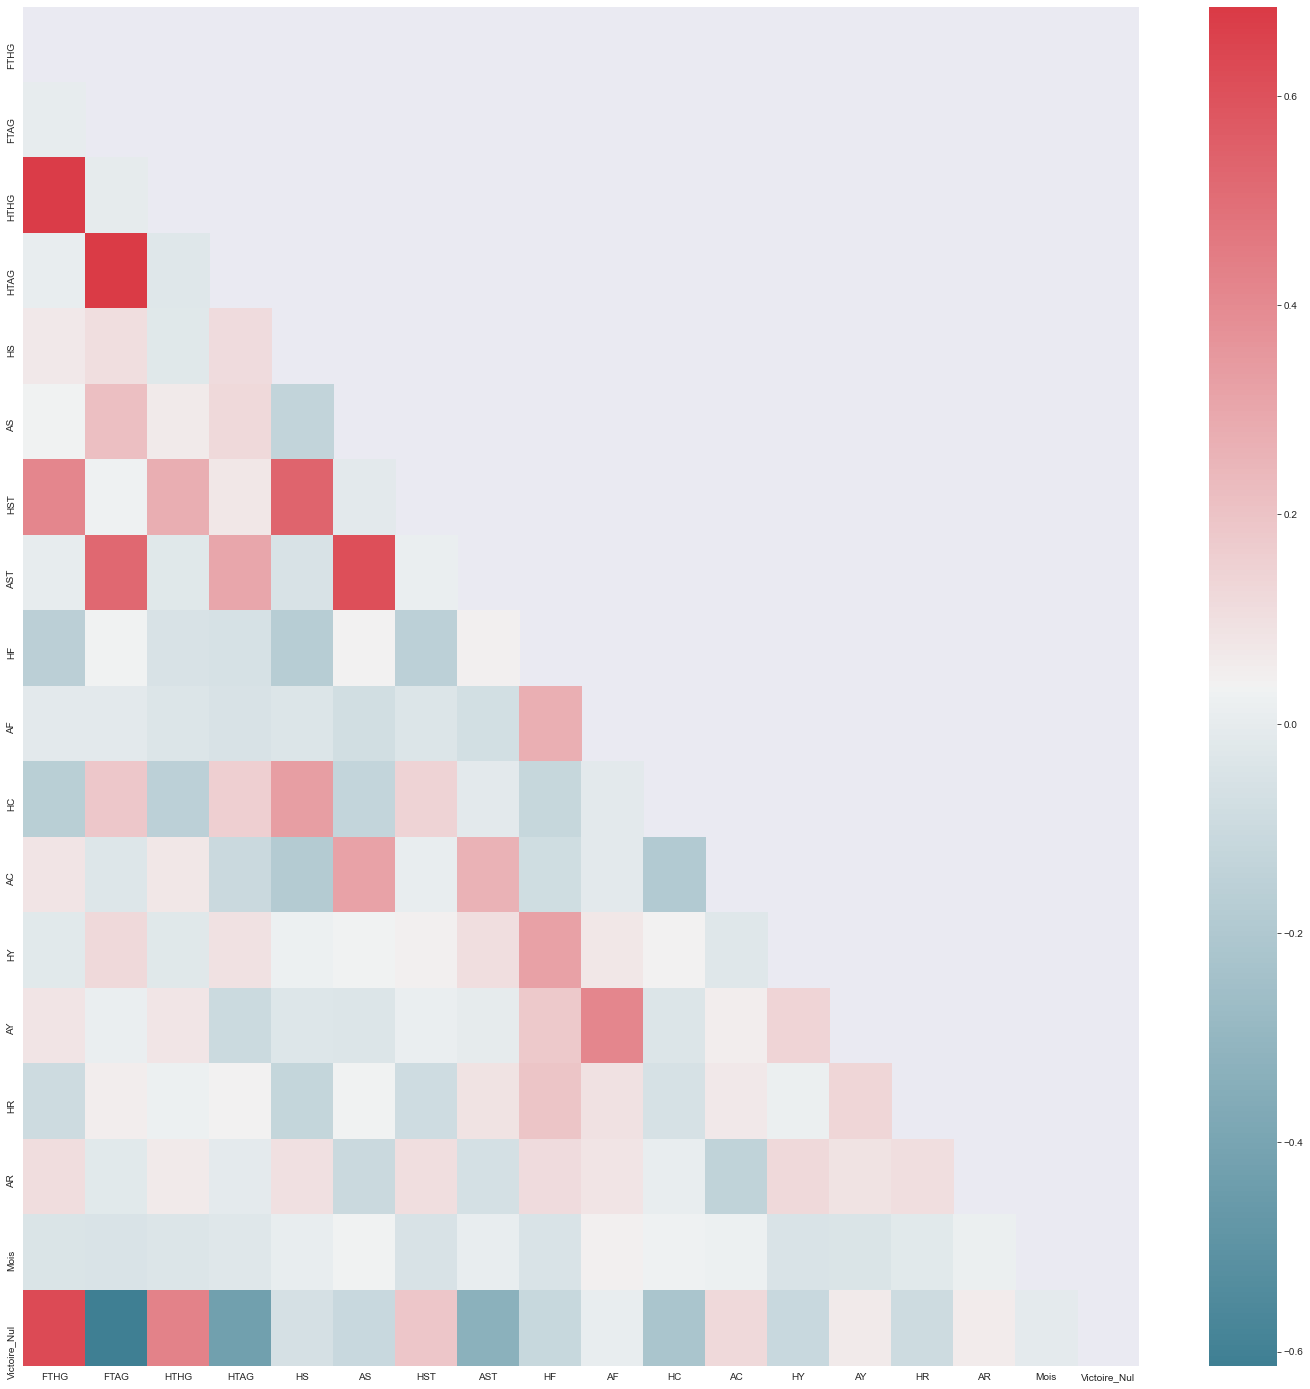

In [101]:
plot_corr(foot_month_corr)
plt.rc('figure', figsize=[8, 8])

**Conclusion :** Nous pouvons remarquer de nombreuses corrélations inverses entre les différentes variables.

Par exemple, nous remarquons une corrélation inversement proportionnelle entre les tirs de l'équipe à l'extérieur (AS) et ceux de l'équipe à domicile (HS).

Nous pouvons aussi remarquer des corrélations proportionnelles entre les buts à la mi temps (HTHG ou HTAG) et les buts en fin de match (FTHG ou FTAG). 

### Scalling before PCA

In [102]:
foot_month_values = foot_month.drop(["HomeTeam","AwayTeam"],axis = 1).copy()
#foot_month_values = foot_month_values.values

In [103]:
foot_month_scaled = StandardScaler().fit_transform(foot_month_values)

### Realizing the PCA

In [104]:
foot_month_pca = PCA().fit(foot_month_scaled)
X_proj = foot_month_pca.transform(foot_month_scaled)

Text(0, 0.5, 'Pourcentages Cumulés')

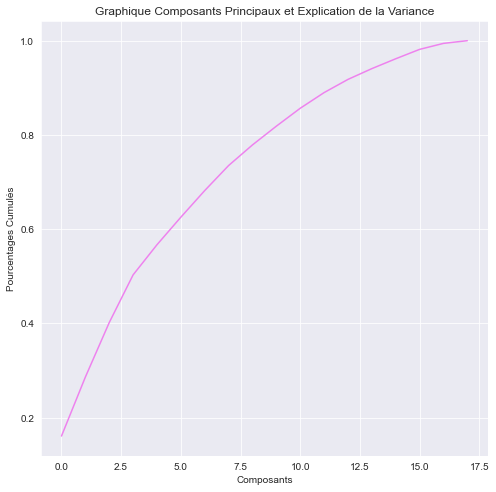

In [105]:
seaborn.set_style('darkgrid')
plt.plot(np.cumsum(foot_month_pca.explained_variance_ratio_), color = 'violet')
plt.title("Graphique Composants Principaux et Explication de la Variance")
plt.xlabel("Composants")
plt.ylabel("Pourcentages Cumulés")

**Conclusion :** Cette fois-ci, le problème semble plus complexe et il faut **10 composantes pour expliquer 90% des variations**. Nous allons nous contenter d'étudier les **4 premières, qui sont déterminantes pour 50% de la variance**.

### Plotting the Points in the New Space Defined by PCA's Vectors

In [106]:
foot_month_2 = foot_month.drop(["HomeTeam","AwayTeam"],axis = 1)
list_columns_2 = list(foot_month_2.columns)

In [107]:
#First component

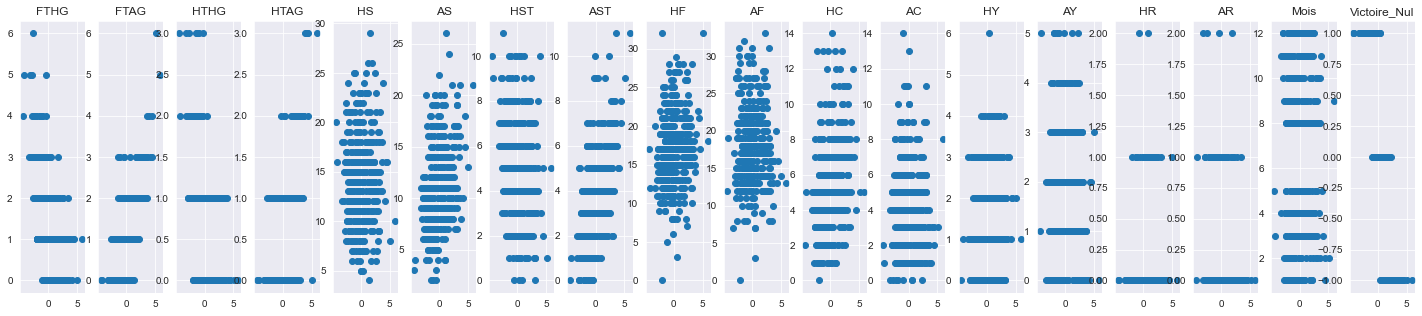

In [117]:
_, axess = plt.subplots(ncols=18, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axess, list_columns_2)):
    ax.scatter(X_proj[:,0], foot_month_2[col])
    ax.set_title(f'{col}')

**Conclusion : Difficile de repérer des corrélations potentielles lorsque les ordres de grandeur des variables sont si réduits!**

Pour cette première composante, on peut cependant dire les choses suivantes :

La **première composante semble corrélée de manière directe au nombre de buts en extérieur (FTAG) et en inverse du nombre de buts à domicile (FTHG)**.
    
Elle semble aussi corrélée de manière **inversement proportionnelle au taux de victoire des équipes (Victoire_Nul)**.
    

In [109]:
#Second component

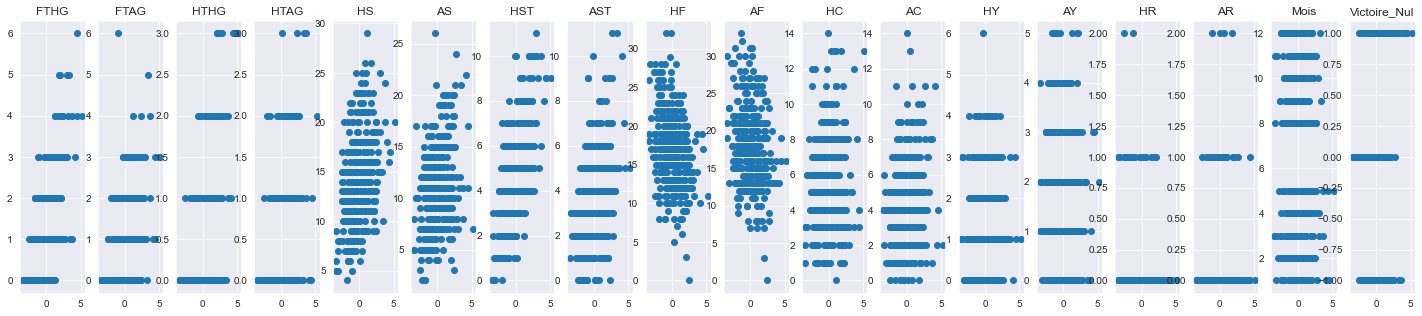

In [118]:
_, axess = plt.subplots(ncols=18, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axess, list_columns_2)):
    ax.scatter(X_proj[:,1], foot_month_2[col])
    ax.set_title(f'{col}')

In [105]:
#Third component

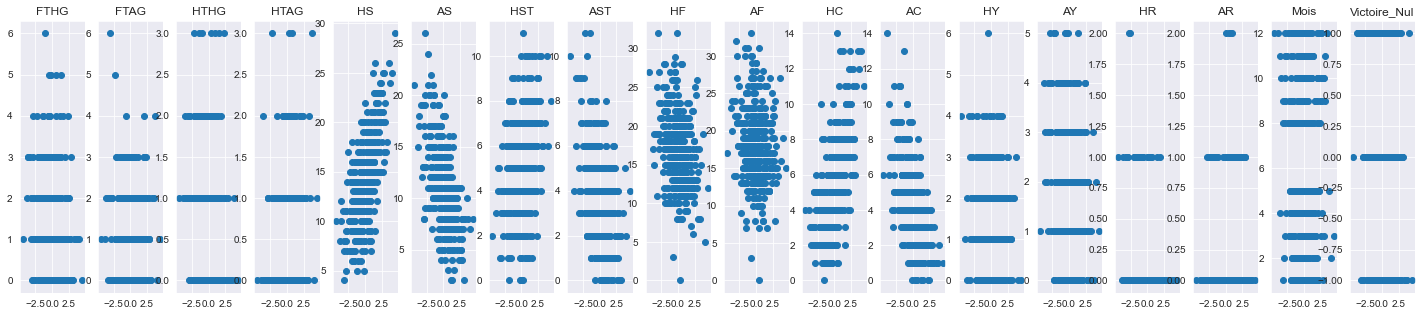

In [119]:
_, axess = plt.subplots(ncols=18, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axess, list_columns_2)):
    ax.scatter(X_proj[:,2], foot_month_2[col])
    ax.set_title(f'{col}')

In [104]:
#Fourth component

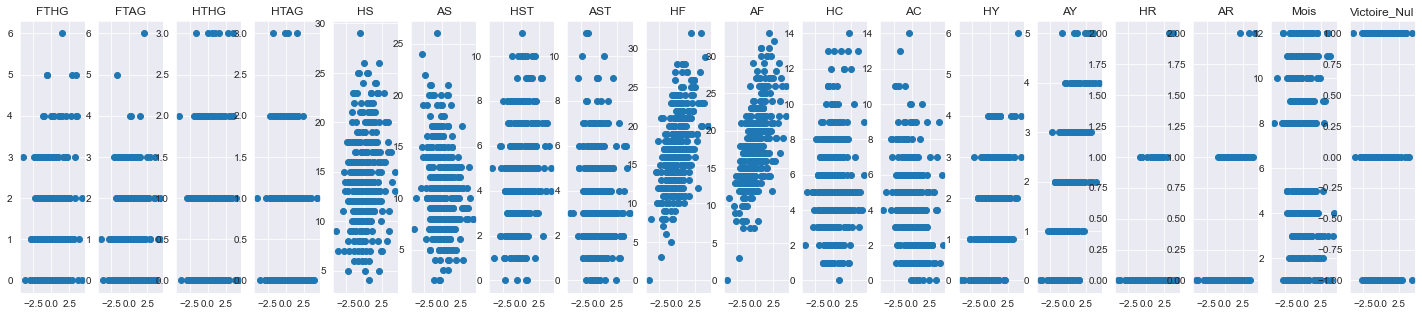

In [120]:
_, axess = plt.subplots(ncols=18, figsize=(25,5))
for i, (ax, col) in enumerate(zip(axess, list_columns_2)):
    ax.scatter(X_proj[:,3], foot_month_2[col])
    ax.set_title(f'{col}')

**Conclusion :** Les **composantes suivantes ne nous donnent pas plus d'informations** : on ne repère pas de corrélation notable.
Cela est **signe d'une grande diversité et d'une grande complexité du jeu de données**, dont les variations ne peuvent pas être expliquées simplement par une combinaison des variables.

## Local clustering of the Second Dataset

Les résultats de l'ACP ne nous aident que peu d'angles d'attaque pour extraire des données pertinentes de ce jeu de données. Nous allons tenter d'**extraire des informations des variables liées à la première composante**.

### Home Goals and Victories

In [155]:
foot_month_clustering1 = foot_month_2.drop(["FTAG","HTHG","HTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","Mois"],axis=1)
for n in range_n_clusters:
    kmeans_foot = KMeans(n_clusters=n, n_init=100).fit(foot_month_clustering1) 
    cluster_labels = kmeans_foot.labels_ 
    silhouette_avg = silhouette_score(foot_month_clustering1, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5679544402518762
For n = 3 Silhouette_score: 0.5677278122245151
For n = 4 Silhouette_score: 0.6009985009752021
For n = 5 Silhouette_score: 0.6499748352495054
For n = 6 Silhouette_score: 0.7588442276962526
For n = 7 Silhouette_score: 0.8014636663300998
For n = 8 Silhouette_score: 0.9159551400035523
For n = 9 Silhouette_score: 0.9593087041908568
For n = 10 Silhouette_score: 0.9729099800297736


Les résultats de cette évalutaion des scores de silhouettes laisse perplexe. **On peut en effet se demander si l'algorithme ne considère pas qu'un groupe par échantillon est un optimum**. Dans le doute, on poursuit tout de même avec n=10 pour obtenir une représentation visuelle.

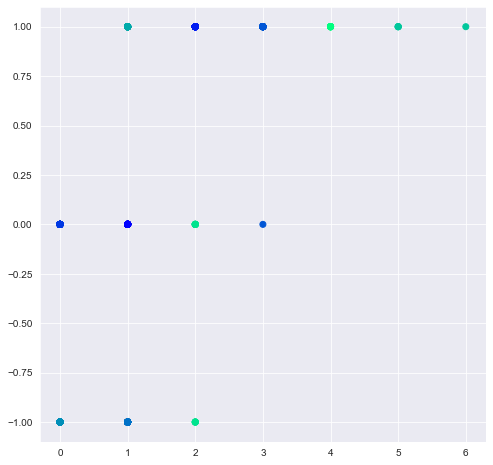

In [158]:
kmeans_foot_month_clustering1 = KMeans(n_clusters=10,n_init=100).fit(foot_month_clustering1)
xHomeGoals = foot_month_clustering1['FTHG']
yResults = foot_month_clustering1['Victoire_Nul']
plt.scatter(xHomeGoals,yResults,c=kmeans_foot_month_clustering1.labels_,cmap=cm.winter)
plt.show()

**Conclusion :** On voit rapidement pourquoi l'**algorithme est disfonctionnel** dans ce cas : le **nombre de combinaisons est trop réduit, et les points sont espacés de manière homogène, donc un optimum correspond à un groupe par point**.

Par conséquent, une **analyse par clustering sur ces relations en particuliers ne mènera a rien**. Avec les outils actuels à notre disposition, on ne peut donc pas analyser correctement les résultats des équipes ramenés mois par mois.

# Why Do We Choose Not to Use the Odds ? 

Nous avons fait un choix qui peut paraître assez surprenant : ne pas utiliser les données liées aux côtes sportives. 

Nous allons donc tenter d'expliquer ce choix-là. 

## First Explanation

Les cotes sportives sont essentiellement fondées sur des historiques dont nous ne disposons pas. En effet, lors des premières journées, il est très dur de déterminer des tendances et des favoris lors de certains matchs. Ainsi, les côtes sont établis grâce aux résultats des années/saisons précédentes. Nous ne disposons donc pas d'éléments suffisant pour analyser les côtes concernant les premiers matchs et comprendrent d'où elles viennent. 

De plus, nous ne savons pas quelles équipes viennent de monter en Ligue 1. Elles évoluaient donc dans un championnat inférieur la saison passée et nous n'avons pas cette information qui vient pourtant influencer les cotes. 

## Second Explanation

Nous n'avons pas non plus souhaité emettre des hypothèses supplémentaires car nous pensions que cela nous sortirait de l'apprentissage non supervisé.

## Third Explanation

Enfin, nous avons trouvé que les cotes n'avait que peu de rapport avec les autres données. Il aurait sans doute fallu les regarder en tant que moyenne, médiane, ou autre. 

De plus, nous ne souhaitions pas faire émerger seulement des corrélations simples comme le nombre de victoires ou de défaites qui influence les cotes. 

# Global Conclusion of the Analysis :

Après avoir décrit le jeu de données qui nous avait été fourni, nous avons fait des choix, des restructurations de données pour finalement aboutir à deux ACP distinctes et de nombreux clustering distincts. 

Les grandes conclusions de chaque partie (Analyses Statistiques & Restructuration de données, ACP et Clustering, Non utilisation des Cotes) sont à retrouver plus haut. 